# Analýza textu pomocí Pythonu

Rád bych úvodem předeslal, že se v tomto spisku nebude hovořit o analýze textu s pomocí hlubokých neuronových sítí. Není to kvůli tomu, že by to byla problematika nezajímavá nebo vzdálená reálným aplikacím. Právě naopak. Jelikož ale s těmito pokročilými technikami nemám absolutně žádnou zkušenost, netroufám si veřejně prezentovat jakoukoli rešerši na ono téma.
Čemu se tedy na následujících řádcích budeme věnovat? Půjde o metody starší, možná ne tak mocné, ale přesto pro určité úlohy stále užitečné. Navíc se bude jednat o věci snáze vysvětlitelné a snáze prezentovatelné i na dýchavičných počítačích. Modely a postupy budou až na určité výjimky pracovat s textem jako s "bag of words". To znamená, že při analýze dokumentů budeme pomíjet vzájemné vtahy mezi slovy a budeme sledovat pouze frekvenci výskytů jednotlivých termínů bez ohledu na kontext, ve kterém se nacházejí.  
Pro začátek bychom si měli zadefinovat několik pojmů.  
**Slovo** - jedná se o základní jednotku dat (textu). Obvykle je zapsáno v nějakém slovníku slov. Na první pohled vypadá tahle definice samozřejmě až zbytečně. Měli bychom ale zmínit, že některé modely (např. LDA) nejsou navázány jenom na text a v takovém případě tak může termín **slovo** označovat i něco, co bychom normálně slovem neoznačili.  
**Dokument** - jedná se o posloupnost X slov. Může jím být jedna věta, ale třeba i celý novinový článek.  
**Korpus** - Jedná se o sbírku Y dokumentů.  

**Obsah**  
[Ruční čištění textu](#Pročištění-textu-normálním-způsobem)  
[Čištění textu pomocí Spacy](#Pročištění-textu-pomocí-spacy)  
[Stemming a lematizace](#Stemming-a-lematizace)  
[Vektorizéry](#Vektorizéry)  
[Term frequency - inverse term frequency (TF-IDF)](#TF-IDF)  
[Latent Dirichlet allocation (LDA)](#LDA)  
[Word2Vec](#Word2Vec)  
[Doc2Vec](#Doc2Vec)  
[Fasttext](#Fasttext)  
[Top2Vec](#Top2Vec)  
[Named entity recognition (NER)](#NER-(Named-entity-recognition))  

### Pročištění textu normálním způsobem
Naším cílem je z určitého textu vydolovat informace. Ty jsou zakódovány v některých slovech, resp. v posloupnosti slov. Avšak tato pro naše potřeby užitečná slova jsou obalena slovy nedůležitými, která nemusí z hlediska ML algoritmu nic dalšího přinášet. Též se v okolí slov mohou vyskytovat HTML tagy anebo interpunkce. Slova zejména v češtině mohou díky skloňování a časování nabývat všelijakých tvarů a oku nepoučeného pozorovatele, kterým počítač je, mohou tyto různé tvary připadat jako zcela separátní termíny. Nakonec pak v dokumentech reálně nevidíme samostatná separovaná slova, nýbrž paragrafy. Ty se skládají z vět a ty jsou zase tvořeny slovy. Nicméně mezi těmito lingvistickými jednotkami neleží Mariánský příkop, nýbrž mezery, tečky či čárky. S tím vším by se počítač srovnával dosti obtížně a tudíž je na místě mu jeho práci usnadnit.  
V této sekci workshopu budeme pracovat s následujícím textem:
> V uplynulých dekádách došlo k razantnímu pokroku v elektronice, k pokroku
tak velkému, že narazil na fyzikální meze svých možností. Zlepšování parametrů
používaných součástek šlo totiž ruku v ruce s jejich miniaturizací, která se ale
z fundamentálních důvodů musí zastavit u rozměrů kolem 10 nm. Na těchto škálách
se totiž začínají projevovat kvantové vlastnosti elektronů, což však není kompatibilní
se současnou výpočetní technikou. V rámci hledání řešení tohoto problému tak začal
v posledních letech značně vzrůstat zájem o spintroniku, což je odvětví elektroniky,
ve kterém se klade důraz nejen na náboj, ale i na spin nabitých nosičů. Je nutné
podotknout, že ačkoli se jedná o relativně nový vědní obor, jedna z jejích aplikací -
čtecí hlavy v pevných discích - je už léta široce rozšířená.

In [18]:
original_text = """V uplynulých dekádách došlo k razantnímu pokroku v elektronice, k pokroku
tak velkému, že narazil na fyzikální meze svých možností. Zlepšování parametrů
používaných součástek šlo totiž ruku v ruce s jejich miniaturizací, která se ale
z fundamentálních důvodů musí zastavit u rozměrů kolem 10 nm. Na těchto škálách
se totiž začínají projevovat kvantové vlastnosti elektronů, což však není kompatibilní
se současnou výpočetní technikou. V rámci hledání řešení tohoto problému tak začal
v posledních letech značně vzrůstat zájem o spintroniku, což je odvětví elektroniky,
ve kterém se klade důraz nejen na náboj, ale i na spin nabitých nosičů. Je nutné
podotknout, že ačkoli se jedná o relativně nový vědní obor, jedna z jejích aplikací -
čtecí hlavy v pevných discích - je už léta široce rozšířená."""

První věc, která nás napadne, je převedení všech písmen na malá - koneckonců význam slova "Zlepšování" je stejný jako u "zlepšování". 

In [19]:
small_change_1 = original_text.lower()
small_change_1

'v uplynulých dekádách došlo k razantnímu pokroku v elektronice, k pokroku\ntak velkému, že narazil na fyzikální meze svých možností. zlepšování parametrů\npoužívaných součástek šlo totiž ruku v ruce s jejich miniaturizací, která se ale\nz fundamentálních důvodů musí zastavit u rozměrů kolem 10 nm. na těchto škálách\nse totiž začínají projevovat kvantové vlastnosti elektronů, což však není kompatibilní\nse současnou výpočetní technikou. v rámci hledání řešení tohoto problému tak začal\nv posledních letech značně vzrůstat zájem o spintroniku, což je odvětví elektroniky,\nve kterém se klade důraz nejen na náboj, ale i na spin nabitých nosičů. je nutné\npodotknout, že ačkoli se jedná o relativně nový vědní obor, jedna z jejích aplikací -\nčtecí hlavy v pevných discích - je už léta široce rozšířená.'

Jelikož chceme pracovat s celým textem naráz a neplánujeme jít větu po větě, chtěli bychom odstranit tečky a vlastně i všechnu ostatní interpunkci. Jak to ale realizovat? Člověka by mohlo napadnout, že si všechny tečky a čárky nahradí standardní stringovou operací za prázdný řetězec. To by se nám ale mohlo šeredně vymstít, pokud by autor zdrojového textu občas za interpunkčním znakem omylem vynechal mezeru. Pak bychom totiž např. z "elektronů,což", udělali "elektronůcož", což by počítač už nerozklíčoval. Nahrazovat interpunkci tudíž budeme za řetězec " ". Kde ale vzít seznam těchto speciálních znaků? Mohli bychom si je sice zapsat do listu, avšak v takovém případě bychom na některý z nich mohli zapomenout. Naštěstí jejich kompletní seznam se nachází v balíčku *string* v listu *punctuation*.  
V tomto kroku taktéž nahradíme znaky nového řádku - ony nevzhledné "\n" - za mezeru.

In [20]:
import string

small_nonelegant_change_2 = small_change_1

interpunction = string.punctuation
for interpunction_char in interpunction:
    small_nonelegant_change_2 = small_nonelegant_change_2.replace(interpunction_char, " ")
small_nonelegant_change_2 = small_nonelegant_change_2.replace("\n", " ")
small_nonelegant_change_2

'v uplynulých dekádách došlo k razantnímu pokroku v elektronice  k pokroku tak velkému  že narazil na fyzikální meze svých možností  zlepšování parametrů používaných součástek šlo totiž ruku v ruce s jejich miniaturizací  která se ale z fundamentálních důvodů musí zastavit u rozměrů kolem 10 nm  na těchto škálách se totiž začínají projevovat kvantové vlastnosti elektronů  což však není kompatibilní se současnou výpočetní technikou  v rámci hledání řešení tohoto problému tak začal v posledních letech značně vzrůstat zájem o spintroniku  což je odvětví elektroniky  ve kterém se klade důraz nejen na náboj  ale i na spin nabitých nosičů  je nutné podotknout  že ačkoli se jedná o relativně nový vědní obor  jedna z jejích aplikací   čtecí hlavy v pevných discích   je už léta široce rozšířená '

Výše uvedený kód lze přepsat do trochu hezčí podoby pomocí funkce *translate*. Ta v řetězci, na který je vypuštěna, nahrazuje znaky podle translační tabulky vyrobené díky funkci *maketrans*. Funkce *maketrans* vytváří mapování jedna ku jedné mezi i-tými elementy svého prvního a druhého argumentu.

In [21]:
import string

small_change_2 = small_change_1

interpunction = string.punctuation
replaced_chars = interpunction + "\n"
replacing_chars = " " * len(replaced_chars)
small_change_2 = small_change_2.translate(str.maketrans(replaced_chars, replacing_chars, ""))
small_change_2

'v uplynulých dekádách došlo k razantnímu pokroku v elektronice  k pokroku tak velkému  že narazil na fyzikální meze svých možností  zlepšování parametrů používaných součástek šlo totiž ruku v ruce s jejich miniaturizací  která se ale z fundamentálních důvodů musí zastavit u rozměrů kolem 10 nm  na těchto škálách se totiž začínají projevovat kvantové vlastnosti elektronů  což však není kompatibilní se současnou výpočetní technikou  v rámci hledání řešení tohoto problému tak začal v posledních letech značně vzrůstat zájem o spintroniku  což je odvětví elektroniky  ve kterém se klade důraz nejen na náboj  ale i na spin nabitých nosičů  je nutné podotknout  že ačkoli se jedná o relativně nový vědní obor  jedna z jejích aplikací   čtecí hlavy v pevných discích   je už léta široce rozšířená '

Máme v plánu text rozkouskovat na jednotlivá slova. Tím se ale ztratí informace o tom, že je desítka vztažena k nanometrům. Proto bychom ji preventivně chtěli odstranit. To se dá udělat například pomocí regulárních výrazů. Konkrétně použijeme funkci *sub*, která v textu (3. argument) nahradí všechny výskyty prvního argumentu za argument druhý. Do prvního argumentu pak vkládáme regexový výraz pro číslovku "\d".

In [22]:
import re
small_change_3 = re.sub("\d", "", small_change_2)
small_change_3

'v uplynulých dekádách došlo k razantnímu pokroku v elektronice  k pokroku tak velkému  že narazil na fyzikální meze svých možností  zlepšování parametrů používaných součástek šlo totiž ruku v ruce s jejich miniaturizací  která se ale z fundamentálních důvodů musí zastavit u rozměrů kolem  nm  na těchto škálách se totiž začínají projevovat kvantové vlastnosti elektronů  což však není kompatibilní se současnou výpočetní technikou  v rámci hledání řešení tohoto problému tak začal v posledních letech značně vzrůstat zájem o spintroniku  což je odvětví elektroniky  ve kterém se klade důraz nejen na náboj  ale i na spin nabitých nosičů  je nutné podotknout  že ačkoli se jedná o relativně nový vědní obor  jedna z jejích aplikací   čtecí hlavy v pevných discích   je už léta široce rozšířená '

Vidíme, že v textu je hodně neužitečných slov (tzv. stopwords) - po rozsekání na jednotlivá slova budou předložky či spojky přinášet snad ještě méně informace než desítka diskutovaná v předchozím odstavci. Jakmile toto vyřešíme, už můžeme podle bílých znaků ono rozsekání - tokenizaci - provést.

In [23]:
CZECH_STOPWORDS = [
    "v", "k", "tak", "že", "na", "totiž", "s", "která", "se", "i", "už",
    "ale", "z", "u", "těchto", "což", "však", "o", "ve", "kterém", "jejich"
]

small_change_4 = [word for word in small_change_3.split() if word not in CZECH_STOPWORDS]
small_change_4

['uplynulých',
 'dekádách',
 'došlo',
 'razantnímu',
 'pokroku',
 'elektronice',
 'pokroku',
 'velkému',
 'narazil',
 'fyzikální',
 'meze',
 'svých',
 'možností',
 'zlepšování',
 'parametrů',
 'používaných',
 'součástek',
 'šlo',
 'ruku',
 'ruce',
 'miniaturizací',
 'fundamentálních',
 'důvodů',
 'musí',
 'zastavit',
 'rozměrů',
 'kolem',
 'nm',
 'škálách',
 'začínají',
 'projevovat',
 'kvantové',
 'vlastnosti',
 'elektronů',
 'není',
 'kompatibilní',
 'současnou',
 'výpočetní',
 'technikou',
 'rámci',
 'hledání',
 'řešení',
 'tohoto',
 'problému',
 'začal',
 'posledních',
 'letech',
 'značně',
 'vzrůstat',
 'zájem',
 'spintroniku',
 'je',
 'odvětví',
 'elektroniky',
 'klade',
 'důraz',
 'nejen',
 'náboj',
 'spin',
 'nabitých',
 'nosičů',
 'je',
 'nutné',
 'podotknout',
 'ačkoli',
 'jedná',
 'relativně',
 'nový',
 'vědní',
 'obor',
 'jedna',
 'jejích',
 'aplikací',
 'čtecí',
 'hlavy',
 'pevných',
 'discích',
 'je',
 'léta',
 'široce',
 'rozšířená']

### Pročištění textu pomocí spacy

Spacy je pythoní balíček na zpracování textu. Klade si za cíl poskytnout uživateli rychlé a kvalitní výsledky bez nutnosti do podrobna zkoumat dokumentaci balíčku (citujme jednoho z tvůrců: "spaCy is written to help you get things done"). Oproti NLTK tak  nenabízí myriádu algoritmů, nýbrž jeho autoři se snažili vybrat ty postupy, které jim přišly pro určitý účel nejlepší.  
Krom samotné instalace balíčku přes pip se musí nainstalovat i modul pro určitý jazyk (viz níže). Bohužel pro češtinu modul prozatím neexistuje. 
```
pip install spacy
python -m spacy download en_core_web_sm
```

Při použití musíme nejprve naimportovat balíček a pak si s pomocí jazykového modulu vytvořit nlp objekt. Ten obsahuje metody umožňující zpracovávat text podle pravidel daného jazyku. Mimo jiné sem patří oddělování slov podle bílých znaků či separace čísel a interpunkce.

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")

Po vytvoření *nlp* objektu ho můžeme vypustit na náš text. Vidíme, že výsledný dokument vypadá na první pohled stejně jako dokument originální. Zdání zde ale klame.

In [27]:
document = nlp(original_text)
document

V uplynulých dekádách došlo k razantnímu pokroku v elektronice, k pokroku
tak velkému, že narazil na fyzikální meze svých možností. Zlepšování parametrů
používaných součástek šlo totiž ruku v ruce s jejich miniaturizací, která se ale
z fundamentálních důvodů musí zastavit u rozměrů kolem 10 nm. Na těchto škálách
se totiž začínají projevovat kvantové vlastnosti elektronů, což však není kompatibilní
se současnou výpočetní technikou. V rámci hledání řešení tohoto problému tak začal
v posledních letech značně vzrůstat zájem o spintroniku, což je odvětví elektroniky,
ve kterém se klade důraz nejen na náboj, ale i na spin nabitých nosičů. Je nutné
podotknout, že ačkoli se jedná o relativně nový vědní obor, jedna z jejích aplikací -
čtecí hlavy v pevných discích - je už léta široce rozšířená.

Nově vytvořený objekt je už totiž rozsekán na tokeny - víceméně slova a interpunkční znaky. Tyto tokeny mají pak atributy nesoucí o nich užitečné informace.
> *.text* ukazuje, jak token vlastně vypadá  
*.lower_* je to samé jako  .text, ale převedené na malá písmena (existuje i .lower, tj. bez podtržítka na konci; to ale ukazuje **asi** ID lowercasovaného tokenu) 
*.is_alpha* je True, pokud se token skládá pouze z písmen  
*.is_punct* je True, pokud je tokenem interpunkční znak  
*.like_num* je True, pokud má token význam čísla. To znaméná, že v případě užití anglického modelu bude True nejen u tokenu "9", ale i u tokenu "nine"  

In [28]:
for token in document:
    print("Token text: ", token.text, 
          "***Is word: ", token.is_alpha, 
          "***Is interpuction: ", token.is_punct, 
          "***Is number: ", token.like_num,
         )

Token text:  V ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  uplynulých ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  dekádách ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  došlo ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  k ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  razantnímu ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  pokroku ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  v ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  elektronice ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  , ***Is word:  False ***Is interpuction:  True ***Is number:  False
Token text:  k ***Is word:  True ***Is interpuction:  False ***Is number:  False
Token text:  pokroku ***Is word:  True ***Is interpuction:  Fals

In [29]:
short_text = nlp("nine ten dot")
for elem in short_text:
    print(elem.text, elem.is_alpha, elem.is_punct, elem.like_num)

nine True False True
ten True False True
dot True False False


Pokud chceme tedy začistit český text, lze použít následující kód. Tady využíváme té skutečnosti, že oddělování slov je v angličtině stejné jako v češtině, takže můžeme použít i anglický model.  
Bacha - v případě chybějící mezery za tečkou, např. u řetězce  "prvni.druhe", k oddělení slov nedojde (u čárky ale už ano).

In [30]:
document = nlp(original_text)
result_list = []
for word in document:
    if ( 
        (not word.like_num) 
        and (not word.is_punct) 
        and (word.text != "\n") 
        and (word.lower_ not in CZECH_STOPWORDS)
       ):
        result_list.append(word.lower_)
result_list

['uplynulých',
 'dekádách',
 'došlo',
 'razantnímu',
 'pokroku',
 'elektronice',
 'pokroku',
 'velkému',
 'narazil',
 'fyzikální',
 'meze',
 'svých',
 'možností',
 'zlepšování',
 'parametrů',
 'používaných',
 'součástek',
 'šlo',
 'ruku',
 'ruce',
 'miniaturizací',
 'fundamentálních',
 'důvodů',
 'musí',
 'zastavit',
 'rozměrů',
 'kolem',
 'nm',
 'škálách',
 'začínají',
 'projevovat',
 'kvantové',
 'vlastnosti',
 'elektronů',
 'není',
 'kompatibilní',
 'současnou',
 'výpočetní',
 'technikou',
 'rámci',
 'hledání',
 'řešení',
 'tohoto',
 'problému',
 'začal',
 'posledních',
 'letech',
 'značně',
 'vzrůstat',
 'zájem',
 'spintroniku',
 'je',
 'odvětví',
 'elektroniky',
 'klade',
 'důraz',
 'nejen',
 'náboj',
 'spin',
 'nabitých',
 'nosičů',
 'je',
 'nutné',
 'podotknout',
 'ačkoli',
 'jedná',
 'relativně',
 'nový',
 'vědní',
 'obor',
 'jedna',
 'jejích',
 'aplikací',
 'čtecí',
 'hlavy',
 'pevných',
 'discích',
 'je',
 'léta',
 'široce',
 'rozšířená']

In [31]:
another_short_text = nlp("prvni.druhe treti,ctvrte")
for elem in another_short_text:
    print(elem.text)

prvni.druhe
treti
,
ctvrte


### Stemming a lematizace

V běžném textu najdeme celou řadu slov, které jsou časováním, skloňováním atd. odvozeny z nějakého "mateřského" slova. Počítač ale tato příbuzná slova bude za normálních okolností brát jako zcela separátní jednotky. Tohle je značný problém u češtiny, ale v menší míře se vyskytuje i u angličtiny. Například slova "working", "works", "worked" atd. jsou všechna nějak napojena na slovo "work" a nemá tudíž smysl, aby při analýze byla od sebe oddělena. Jak lze ale slova převést na slovo původní?  
Jedním možným řešením je stemming. De facto se jedná o osekávání koncovek s cílem dostat kořen slova. Problém ale spočívá ve skutečnosti, že pokud tento kořen bude stát samostatně mimo kontext okolních slov, nemusí být jasné, o jaké slovo se vlastně původně jednalo.  
Cílem lemmatizace je oproti tomu najít slovo, ze kterého byla slova odvozená vytvořena. Snáze se tudíž interpretuje, ale o to obtížnější je lemmatizační model vytvořit. Mimo jiné je totiž často potřeba, aby algoritmus dokázal určit slovní druh jednotlivých slov ve větě. Například "broken" jako příslovce má lemma "broken", zatímco jako sloveso by mělo mít lemma "break".

In [32]:
english_text = "This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices. In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases. We developed a method based on material optical response for a quick determination of this temperature, which enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal. We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."
czech_text = "Tato práce se zabývá studiem dvou antiferomagnetických materiálů, které jsou principielně použitelné pro spintronické aplikace. V sérii vzorků FeRh jsme studovali teplotu přechodu mezi antiferomagnetickou a feromagnetickou fází. Vyvinuli jsme na optické odezvě založenou metodu na rychlé určení této teploty, která nám následně umožnila studovat s prostorovým rozlišením 1 μm magnetickou nehomogenity připravených vzorků. Dále jsme vyvinuli metodu pro nalezení Néelovy teploty a snadné osy magnetizace v tenkých filmech připravených z kovového kompenzovaného antiferomagnetu. Tuto metodu jsme úspěšně aplikovali na uniaxiální vzorek CuMnAs a diskutovali jsme její použitelnost i pro vzorky s biaxiální magnetickou anizotropií."
print(english_text)
print(czech_text)

interpunction = string.punctuation
replacing_chars = " " * len(interpunction)
english_text = english_text.translate(str.maketrans(interpunction, replacing_chars, ""))
czech_text = czech_text.translate(str.maketrans(interpunction, replacing_chars, ""))

This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices. In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases. We developed a method based on material optical response for a quick determination of this temperature, which enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal. We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy.
Tato práce se zabývá studiem dvou antiferomagnetických materiálů, které jsou principielně použitelné pro spintronické aplikace. V sérii vzorků FeRh jsme studovali teplotu přechodu mezi antiferomagnetickou a fe

Pro stemming anglického textu použijeme PorterStemmer z balíčku gensim.

In [35]:
from gensim.parsing.porter import PorterStemmer

p = PorterStemmer()
p.stem_sentence(english_text)

'thi work is dedic to the studi of two antiferromagnet materi that ar suitabl for us in spintron devic in seri of ferh sampl we studi the transit temperatur between the antiferromagnet and ferromagnet phase we develop a method base on materi optic respons for a quick determin of thi temperatur which enabl us to studi with a spatial resolut of 1 μm a magnet inhomogen of prepar sampl we also develop a method for a determin of the néel temperatur and the magnet easi axi posit in thin film prepar from compens antiferromagnet metal we successfulli appli thi method on an uniaxi sampl of cumna and we discuss it applic for a research of sampl with a biaxial magnet anisotropi'

Všimněme si zde toho, že slova "is" a "are" byla převedena na "is" a "ar", nikoli na jedno sjednocující "be".

Co se českého stemmeru týče, našel jsem 10 let starý od Luisa Gomese a to sice na https://github.com/UFAL-DSG/alex/blob/master/alex/utils/czech_stemmer.py. Mimo jiné je z odkazu vidět, že stemmery jsou víceméně souborem heuristik, které musel znalec příslušného jazyka převést do počítačového kódu.  
Jelikož je stemmer zjevně psaný pro Python 2, musí se:
- změnit řádka 34 z "    if isinstance(l, str) or isinstance(l, unicode):" na "    if isinstance(l, str):"
- na řádku 172 dát argument printu do závorek.  

Pozn.: Pokud vám spuštění následující buňky povede k chybě, tak musíte do stejného adresáře, ve kterém bydlí notebook, stáhnout z Githubu soubor czech_stemmer.py.

In [36]:
import czech_stemmer

In [37]:
czech_stemmer.cz_stem(czech_text.split())

['Tat',
 'prák',
 'se',
 'zabýv',
 'studi',
 'dvo',
 'antiferomagnetick',
 'materiál',
 'kter',
 'jso',
 'principieln',
 'použiteln',
 'pro',
 'spintronick',
 'aplikak',
 'V',
 'séri',
 'vzork',
 'FeRh',
 'jsm',
 'studoval',
 'teplot',
 'přechod',
 'meh',
 'antiferomagnetick',
 'a',
 'feromagnetick',
 'fáz',
 'Vyvinul',
 'jsm',
 'na',
 'optick',
 'odezv',
 'založen',
 'metod',
 'na',
 'rychl',
 'určen',
 'tét',
 'teplot',
 'kter',
 'nám',
 'následn',
 'umožnil',
 'stud',
 's',
 'prostor',
 'rozliše',
 '1',
 'μm',
 'magnetick',
 'nehomogenit',
 'připraven',
 'vzork',
 'Dál',
 'jsm',
 'vyvinul',
 'metod',
 'pro',
 'nalezen',
 'Néel',
 'teplot',
 'a',
 'snadn',
 'osy',
 'magnetizak',
 'v',
 'tenk',
 'film',
 'připraven',
 'z',
 'kovov',
 'kompenzovan',
 'antiferomagnet',
 'Tut',
 'metod',
 'jsm',
 'úspěšn',
 'aplikoval',
 'na',
 'uniaxiáln',
 'vzorek',
 'CuMnAs',
 'a',
 'diskutoval',
 'jsm',
 'jej',
 'použitelnost',
 'i',
 'pro',
 'vzork',
 's',
 'biaxiáln',
 'magnetick',
 'anizotropi']

Co se týče lemmatizace anglického textu, je asi nejsnazší použít balíček spacy. 

In [38]:
import spacy
nlp = spacy.load("en_core_web_sm")
document = nlp(english_text)

for word in document:
    print(word.lower_, word.lemma_)

this this
work work
is be
dedicated dedicate
to to
the the
study study
of of
two two
antiferromagnetic antiferromagnetic
materials material
that that
are be
suitable suitable
for for
use use
in in
spintronic spintronic
devices device
   
in in
series series
of of
ferh FeRh
samples sample
we we
studied study
the the
transition transition
temperature temperature
between between
the the
antiferromagnetic antiferromagnetic
and and
ferromagnetic ferromagnetic
phases phase
   
we we
developed develop
a a
method method
based base
on on
material material
optical optical
response response
for for
a a
quick quick
determination determination
of of
this this
temperature temperature
   
which which
enabled enable
us we
to to
study study
with with
a a
spatial spatial
resolution resolution
of of
1 1
μm μm
a a
magnetic magnetic
inhomogeneity inhomogeneity
of of
prepared prepared
samples sample
we we
also also
developed develop
a a
method method
for for
a a
determination determination
of of
the the
née

Vidíme, že značný počet slov vůbec lematizací změněn nebyl. Občas se odsekne přípona -s spojená s množným číslem či -ed zajišťjící časování slovesa. Také ale vidíme, že se ze zájmen stalo -PRON- (to je z technických důvodů - https://github.com/explosion/spaCy/issues/962) a "is" se proměnilo v "be". Každopádně interpretace lemmat je vskutku mnohem snazší než interpretace stemmů.

Pro lemmatizaci českého textu lze použít balíček morphodita. Pro jeho fungování je nutno načíst soubor "czech-morfflex-161115.dict" - ten lze stáhnout [odtud](http://ufal.mff.cuni.cz/morphodita#download). Pro některé uživatele ale může být problematické, že zdrojová data modelů (tipoval bych, že https://github.com/UniversalDependencies/UD_Czech-PDT), se kterými balíček pracuje, jsou pod licencí [CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/4.0/) - tady ona písmena NC znamenajíc non-commercial.

In [41]:
import ufal.morphodita as ufm
morpho = ufm.Morpho.load("czech-morfflex-161115.dict")

In [42]:
lemmas = ufm.TaggedLemmas()
tokens = czech_text.lower().split()
for token in tokens:
    morpho.analyze(token, morpho.GUESSER, lemmas)
    print(token, lemmas[0].lemma)

tato tata_,h_,n_^(tatínek)
práce práce_^(jako_činnost_i_místo)
se se_^(zvr._zájmeno/částice)
zabývá zabývat_:T
studiem studio
dvou dva`2
antiferomagnetických antiferomagnetický
materiálů materiál
které který
jsou být
principielně principielně_^(*4ální)
použitelné použitelný_^(*6ít)
pro pro-1
spintronické spintronický
aplikace aplikace
v v-1
sérii série
vzorků vzorek
ferh ferh
jsme být
studovali studovat_:T
teplotu teplota
přechodu přechod
mezi mez
antiferomagnetickou antiferomagneticka
a a-1
feromagnetickou feromagnetický
fází fáze
vyvinuli vyvinout
jsme být
na na-1
optické optický
odezvě odezva
založenou založený_^(*3it)
metodu metoda
na na-1
rychlé rychlý
určení určený_^(*3it)
této tento
teploty teplota
která který
nám já
následně následně_^(*1ý)
umožnila umožnit_:W
studovat studovat_:T
s s-1
prostorovým prostorový
rozlišením rozlišení_^(*3it)
1 1
μm μ
magnetickou magnetický
nehomogenity nehomogenita
připravených připravený_^(*3it)
vzorků vzorek
dále dál
jsme být
vyvinuli vyvinout
me

Co máme ale dělat, pokud chceme lemmatizátor českého textu a náš use-case je "commercial"? V takovém případě lze využít balíček majka a na něj navázané [jazykové modely](https://nlp.fi.muni.cz/ma/), které jsou pod volnější [CC BY-SA licencí](https://creativecommons.org/licenses/by-sa/3.0/).

In [2]:
import majka
morph_majka = majka.Majka("majka.w-lt")

Defaultní výstupem majky není jedno lemma, ale soubor všech možných lemmat včetně informace o pádu, rodu, negaci apod.

In [8]:
morph_majka.find("nejnevhodnější")[0:2]

[{'lemma': 'vhodný',
  'tags': {'pos': 'adjective',
   'negation': True,
   'gender': 'feminine',
   'plural': True,
   'case': 1,
   'degree': 3}},
 {'lemma': 'vhodný',
  'tags': {'pos': 'adjective',
   'negation': True,
   'gender': 'feminine',
   'plural': True,
   'case': 4,
   'degree': 3}}]

To častokrát nechceme, naštěstí se však dá upovídaný výstup omezit. Lze nastavit, že se člověku zobrazí jen první lemma s příslušenstvím (flag *first_only*), že se přídavné informace nezobrazí (flag *tags*) a že se negace lemmatu projeví přidáním předpony "ne" (flag *negative*).

In [10]:
morph_majka.first_only = True 
morph_majka.tags = False
morph_majka.negative = "ne"

Pak u normálního českého slova vidíme něco na tento způsob:

In [13]:
morph_majka.find("nejnevhodnější")

[{'lemma': 'nevhodný'}]

Když se podíváme na velikosti jazykových modelů pro morphoditu a majku, vidíme, že ten první má trojnásobnou velikost. To znamená, že majka nezná lemmata vzácnějších slov. Výše jsme viděli, že morphodita správně lemmatizovala slovo "antiferomagnetu". Majka si s ním bohužel neporadí a dokonce ani nevrátí původní slovo, nýbrž jen prázdný list.

In [16]:
morph_majka.find("antiferomagnetu")

[]

Na to se pak musí myslet při lemmatizaci celého textu.

In [17]:
tokens = czech_text.lower().split()
for token in tokens:
    lemma_list = morph_majka.find(token)
    if lemma_list:
        print(lemma_list[0]["lemma"])
    else:
        print(token)

tata
práce
se
zabývat
studio
dva
antiferomagnetických
materiál
který
být
principielně
použitelný
pro
spintronické
aplikace
v
série
vzorek
ferh
být
studovat
teplota
přechod
mezi
antiferomagnetickou
a
feromagnetickou
fáze
vyvinout
být
na
optický
odezva
založený
metoda
na
rychlý
určení
tento
teplota
který
my
následně
umožnit
studovat
s
prostorový
rozlišení
1
μm
magnetický
nehomogenity
připravený
vzorek
dále
být
vyvinout
metoda
pro
nalezení
néelovy
teplota
a
snadný
osa
magnetizace
v
tenký
film
připravený
z
kovový
kompenzovaný
antiferomagnetu
tento
metoda
být
úspěšně
aplikovat
na
uniaxiální
vzorek
cumnas
a
diskutovat
být
její
použitelnost
i
pro
vzorek
s
biaxiální
magnetický
anizotropií


### Vektorizéry

Dejme tomu, že jsme už text vyčistili. Nicméně předat ho nějakému algoritmu, dejme tomu logistické regresi, ještě nemůžeme. Většina algoritmů by si totiž se slovy neporadila - očekávají totiž vstup v podobě čísel. Převod slov na čísla tak musíme zajistit vektorizéry (přesněji jejich funkcí *fit*). Ty vezmou nějakou sadu vět (obvykle trénovací data, ale není to bezpodmíněčně nutné) a každému slovu z těchto vět přiřadí unikátní IDčko.  

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [46]:
source_documents = [
"This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices.",
"In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases.",
"We developed a method based on material optical response for a quick determination of this temperature.",
"This enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.",
"We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal.",
"We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."]
commmon_vectorizer = CountVectorizer()
commmon_vectorizer.fit(source_documents);

Pokud chceme znát mapování mezi slovy a čísly, podíváme se na proměnnou vocabulary_. Ta je významově i implementačně slovníkem.

In [23]:
commmon_vectorizer.vocabulary_

{'this': 60,
 'work': 69,
 'is': 28,
 'dedicated': 14,
 'to': 61,
 'the': 58,
 'study': 53,
 'of': 37,
 'two': 63,
 'antiferromagnetic': 4,
 'materials': 33,
 'that': 57,
 'are': 7,
 'suitable': 55,
 'for': 24,
 'use': 66,
 'in': 26,
 'spintronic': 51,
 'devices': 17,
 'series': 49,
 'ferh': 21,
 'samples': 48,
 'we': 67,
 'studied': 52,
 'transition': 62,
 'temperature': 56,
 'between': 10,
 'and': 2,
 'ferromagnetic': 22,
 'phases': 40,
 'developed': 16,
 'method': 35,
 'based': 9,
 'on': 38,
 'material': 32,
 'optical': 39,
 'response': 46,
 'quick': 43,
 'determination': 15,
 'enabled': 20,
 'us': 65,
 'with': 68,
 'spatial': 50,
 'resolution': 45,
 'μm': 70,
 'magnetic': 30,
 'inhomogeneity': 27,
 'prepared': 42,
 'also': 0,
 'néel': 36,
 'magnetization': 31,
 'easy': 19,
 'axis': 8,
 'position': 41,
 'thin': 59,
 'films': 23,
 'from': 25,
 'compensated': 12,
 'metal': 34,
 'successfully': 54,
 'applied': 6,
 'an': 1,
 'uniaxial': 64,
 'sample': 47,
 'cumnas': 13,
 'discussed': 18

Pakliže bychom chtěli znát pouze ve slovníku uvedená slova:

In [24]:
commmon_vectorizer.get_feature_names()

['also',
 'an',
 'and',
 'anisotropy',
 'antiferromagnetic',
 'applicability',
 'applied',
 'are',
 'axis',
 'based',
 'between',
 'biaxial',
 'compensated',
 'cumnas',
 'dedicated',
 'determination',
 'developed',
 'devices',
 'discussed',
 'easy',
 'enabled',
 'ferh',
 'ferromagnetic',
 'films',
 'for',
 'from',
 'in',
 'inhomogeneity',
 'is',
 'its',
 'magnetic',
 'magnetization',
 'material',
 'materials',
 'metal',
 'method',
 'néel',
 'of',
 'on',
 'optical',
 'phases',
 'position',
 'prepared',
 'quick',
 'research',
 'resolution',
 'response',
 'sample',
 'samples',
 'series',
 'spatial',
 'spintronic',
 'studied',
 'study',
 'successfully',
 'suitable',
 'temperature',
 'that',
 'the',
 'thin',
 'this',
 'to',
 'transition',
 'two',
 'uniaxial',
 'us',
 'use',
 'we',
 'with',
 'work',
 'μm']

Nyní bychom chtěli podle výše uvedeného slovníku provést převod textových dokumentů na vektory. To zrealizujeme pomocí funkce *transform*. V případě, že bychom takto chtěli transformovat trénovací data, museli bych *trasform* vypustit na ty samá data, na která byla vypuštěna i funkce *fit*. Pro zefektivnění tohoto častého případu proto existuje funkce *fit_transform*, která v sobě oba diskutované procesy spojuje.

In [26]:
new_document = ["some antiferromagnetic materials can be useful, another antiferromagnetic materials are useless",
"are plastic bottles antiferromagnetic"]
new_document_vector = commmon_vectorizer.transform(new_document)

Délka vektorů bude odpovídat počtu elementů ve slovníku. Pakliže slovo s IDčkem i v trasformovaném dokumentu neexistuje, bude i-tý prvek vektoru nulový. Pakliže je takových slov v dokumentu dejme tomu pět a vektorizér, který byl použit, je CountVectorizer, byde na i-té pozici vektoru pětka.  
Při printění vektoru se pro zvýšení přehlednosti neukazuje celý vektor, ale pouze jeho nenulové prvky. První číslo v tuplu udává index dokumentu. Druhé číslo tuplu odpovídá pořadovému číslo elementu vektoru, který není nulový. Vpravo pak stojí hodnota na tomto indexu alias počet výskytů slova v dokumentu.  
Pakliže se v dokumentu objevilo slovo, které není ve slovníku, vůbec nijak se ve vektoru nepromítne.  
Jako příklad si vezměme větu "are plastic bottles antiferromagnetic". Slova "platic" a "bottles" ve slovníku nejsou, takže je ignorujeme. Slovo "are" má ve slovníku ID 7, slovo "antiferromagnetic" má ID 4. Obě slova se v dokumentu objevují pouze jednou. Vektor dokumentu má tak tvar (0, 0, 0, 0, 1, 0, 0, 1, 0, ... , 0). Pro zjednodušení se vypíší jen nenulové elementy. Jelikož se jedná o druhý předaný dokument (a indexace začíná od nuly), píšeme  
(1, 4)  1  
(1, 7)  1  

In [27]:
print("Shape of vector matrix")
print(new_document_vector.shape)
print("1st document vector")
print(new_document_vector[0])
print("2nd document vector")
print(new_document_vector[1])
print("Both vectors")
print(new_document_vector)
print("2nd document vector not in compressed but in normal representation")
print(new_document_vector[1].toarray())

Shape of vector matrix
(2, 71)
1st document vector
  (0, 4)	2
  (0, 7)	1
  (0, 33)	2
2nd document vector
  (0, 4)	1
  (0, 7)	1
Both vectors
  (0, 4)	2
  (0, 7)	1
  (0, 33)	2
  (1, 4)	1
  (1, 7)	1
2nd document vector not in compressed but in normal representation
[[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Pokud se chceme rychle podívat, jaká slova vektor vlastně zachycuje, použijeme funkce *inverse_transform*.

In [28]:
commmon_vectorizer.inverse_transform(new_document_vector)

[array(['antiferromagnetic', 'are', 'materials'], dtype='<U17'),
 array(['antiferromagnetic', 'are'], dtype='<U17')]

Nyní jsme tedy převedli jednotlivé dokumenty na poslopunosti čísel, které mohou být vstupem dejme tomu pro logisticku regresi. Nicméně použití je i jiné - lze vypočítat, jak moc se mezi sebou jednotlivé dokumenty liší. Asi nejjednodušší metrika toto umožňující je kosinová podobnost K definovaná jako    
$K(X, Y) = \frac {<X, Y>}{(||X||*||Y||)}$   
Zde <X,Y> je skalární součin mezi vektory X a Y, ||X|| je velikost vektoru X (tj. odmocnina ze sumy druhých mocnin jednotlivých složek vektoru).  
Kosinovou podobnost si můžeme spočítat sami, anebo lze použít funkci z sci-kit learnu.

In [29]:
import numpy as np
print("First vector")
print(new_document_vector[0])
print("Second vector")
print(new_document_vector[1])
print("Magnitude of the first and the second vector")
vector_abs_value_1 = np.linalg.norm(new_document_vector[0].toarray())
vector_abs_value_2 = np.linalg.norm(new_document_vector[1].toarray())
print(vector_abs_value_1, vector_abs_value_2)
print("Scalar product of vectors")
scalar_product = new_document_vector[0].toarray()@new_document_vector[1].toarray().transpose()
print(scalar_product)
print("Cosine similarity")
print(scalar_product/(vector_abs_value_1*vector_abs_value_2))

First vector
  (0, 4)	2
  (0, 7)	1
  (0, 33)	2
Second vector
  (0, 4)	1
  (0, 7)	1
Magnitude of the first and the second vector
3.0 1.4142135623730951
Scalar product of vectors
[[3]]
Cosine similarity
[[0.70710678]]


In [30]:
from  sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(new_document_vector[0],new_document_vector[1])

array([[0.70710678]])

Sanity check - podobnost vektoru k sobě samému je 1 (alias 100%).

In [31]:
from  sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(new_document_vector[1],new_document_vector[1])

array([[1.]])

K čemu to může být dobré? Například k tomu, že člověk zadá nějaký dokument (větu) a posléze nalezne v množině jiných dokumentů ten, který bude tomu původnímu nejpodobnější.  
Níže vidíme, že dokument "are plastic bottles antiferromagnetic" má nejblíže k "This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices." Oproti tomu s "We developed a method based on material optical response for a quick determination of this temperature." nemá nic společného (není tu ani "are", ani "antiferromagnetic").

In [32]:
user_document = new_document_vector[1]
transformed_documents = commmon_vectorizer.transform(source_documents)
no_of_original_docs = transformed_documents.shape[0]
for index in range(no_of_original_docs):
    similarity = cosine_similarity(transformed_documents[index],user_document)
    print(similarity)

[[0.32444284]]
[[0.16666667]]
[[0.]]
[[0.]]
[[0.13867505]]
[[0.]]


Může se stát, že v dokumentech, s jejichž pomocí slovník vytváříme, budou velice vzácná slova. To by samo o sobě nebyl problém, koneckonců takové údaje pak mohou určitou skupinu dokumentů charakterizovat. Komplikace nastávají v situaci, kdy se určité slovo vyskytuje pouze v jednom dokumentu (a je jedno, jestli jednou anebo desetkrát). Pak je na zvážení, jestli by se takové slovo nemělo z dokumentu vyhodit, neboť se v dokumentech později transformovaných slovníkem na vektory asi také nevyskytne. Pouze tak zbytečně zvětší délku vektorů. Proto lze při vytváření slovníku vložit do parametrů funkce atribut *min_df*, který tyto typy slov vyřadí.  
V příkladu níže vyhazujeme všecchna slova, která se nevyskytují aspoň ve dvou dokumentech.

In [33]:
source_documents = [
"This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices.",
"In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases.",
"We developed a method based on material optical response for a quick determination of this temperature.",
"This enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.",
"We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal."
"We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."]
commmon_vectorizer = CountVectorizer(min_df=2)
commmon_vectorizer.fit(source_documents)
commmon_vectorizer.get_feature_names()

['and',
 'antiferromagnetic',
 'determination',
 'developed',
 'for',
 'in',
 'magnetic',
 'method',
 'of',
 'on',
 'prepared',
 'samples',
 'study',
 'temperature',
 'the',
 'this',
 'to',
 'we',
 'with']

Slovník se razantně zmenšil. Na druhou stranu vidíme, že je v něm hromada stopwords. Ty buď odstraníme postupy popsanými v předchozí sekci, anebo aplikujeme parametr *max_df=X*. Díky jemu se vyhodí všechny slova, která se vyskytují ve více než X dokumentech.

In [34]:
source_documents = [
"This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices.",
"In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases.",
"We developed a method based on material optical response for a quick determination of this temperature.",
"This enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.",
"We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal."
"We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."]
commmon_vectorizer = CountVectorizer(min_df=2, max_df=2)
commmon_vectorizer.fit(source_documents)
commmon_vectorizer.get_feature_names()

['and',
 'determination',
 'developed',
 'magnetic',
 'method',
 'on',
 'prepared',
 'study',
 'to',
 'with']

Jiným způsobem, jak redukovat velikost slovníku, je do funkce fit  vložit *max_meatures=X*. Do slovníku se tak dostane jen X nejčastěji zastoupených slov v korpusu.

In [35]:
source_documents = [
"This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices.",
"In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases.",
"We developed a method based on material optical response for a quick determination of this temperature.",
"This enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.",
"We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal."
"We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."]
commmon_vectorizer = CountVectorizer(max_features=10)
commmon_vectorizer.fit(source_documents)
commmon_vectorizer.get_feature_names()

['and',
 'antiferromagnetic',
 'for',
 'in',
 'method',
 'of',
 'samples',
 'the',
 'this',
 'we']

Vektorizéry počítají se zjednodušujícím předpokladem, že uspořádání slov v dokumentech nehraje roli. Může se ale často stávat, že dvě slova často stojící vedle sebe mají specifický význam, např. "Česká republika". Těmto dvojicím se říká bigramy, trojice by se nazývaly trigramy, samostatně stojící slovo je unigram a název pro N slov stojících u sebe je N-gram.   Vektorizéry umožňují do slovníku přidat i tyto konstrukce a to sice pomocí parametru *ngram_range=(1, 2)*. První číslo udává minimální velikost N-gramu, druhé číslo jeho velikost maximální. Tj. v uvedeném příkladu se do slovníku dostanou unigramy a bigramy.  
Použití N-gramů bez dalších opatření vede ke zvětšování slovníku o víceméně náhodná sousloví. Proto je potřeba slovník nějak omezit, např. pomocí *min_df*.  
Pozn.: v příkladu níže vyplavaly víceméně díky náhodě dva bigramy, u kterých o žádné ustálené slovní spojení nejde. Tomu se dá předejít dostatečně velkým korpusem a dostatečně velkou hodnotou min_df.

In [36]:
source_documents = [
"This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices.",
"In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases.",
"We developed a method based on material optical response for a quick determination of this temperature.",
"This enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.",
"We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal."
"We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."]
commmon_vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=2)
commmon_vectorizer.fit(source_documents)
commmon_vectorizer.get_feature_names()

['and',
 'antiferromagnetic',
 'determination',
 'determination of',
 'developed',
 'developed method',
 'for',
 'in',
 'magnetic',
 'method',
 'of',
 'on',
 'prepared',
 'samples',
 'study',
 'temperature',
 'the',
 'this',
 'to',
 'we',
 'with']

### TF-IDF
Vypuštění natrénovaného count vektorizéru na dokument povede k vytvoření vektoru, jehož jednotlivé složky budou odpovídat počtu výskytu určitého slova v dokumentu. Je tak tedy zajištěno, že pokud je termín X v dokumentu víckrát, bude mít i příslušná složka vektoru větší váhu. Tudíž pak bude tento vektor více podobný jinému vektoru zastupujícímu dokument z podobné oblasti. Co ale když je termín X typický pro všechny dokumenty? Potom nám jeho velká četnost pro při určování podobnosti dokumentů moc nepomůže. Chtělo by to do vektorů zahrnout informace nejen o zastoupení termínu v jednom dokumentu, ale i o četnosti termínu ve všech studovaných dokumentech. Právě to zajišťuje Tf-Idf metrika.  
*Tf* značí *term-frequency*. Samotný počet výskytů termínu by nebyl dostatečně průkazný - přeci jen je rozdíl, jestli se určité slovo vyskytuje dvakrát ve větě složené z 5 anebo z 50 slov. Term frequency už v sobě proto toto normování na délku věty zahrnuje. Pro *Tf* slova X platí vztah  
> Tf(X) = (počet výskytů slova X v dokumentu)/(počet slov v dokumentu)  

Zkratka *Idf* znamená *inverse document frequency*. Vystihuje, jak je určité slovo z hlediska množiny zkoumaných dokumentů informačně hodnotné. Například pokud zkoumáne recenze filmů, bude slovo "film" téměř v každém dokumentu a tak se na nějaké určování podobnosti textů použít nedá. Naopak užitečné pro nás budou slova vyskytující se jen ve výseku dokumentů.
Platí rovnice  
> Idf(X) = log(počet dokumentů/počet dokumentů obsahující slovo X)+1  

Jednička se v rovnici vyskytuje proto, aby nebylo ani slovo, které se vyskytujue v každém dokumentu a tudíž je pro něj logaritmus nulový, úplně opomenuto. V takovémto případu máme Idf = log(1)+1=0+1=1. Naopak pokud je slovo obsaženo jen v jednom z 10000 dokumentů, dostaneme po dosazení Idf = log(10000)+1 = 5  
Ideální případ by nastal, pokud by klíčové slovo bylo jen v jednom dokumentu, ale mnohokrát. Proto pro výslednou metriku spolu Tf a Idf pronásobíme.  
Samozřejmě ručně nemusíme počítat nic, stačí na text vypustit *TfidfVectorizer*. Jedná se víceméně o *CountVectorizer*, za který je napojen *TfidfTransformer* provádějící výše popsané operace.  
Asi je ale nutné poznamentat, že sci-kit learn nepoužívá výše uvedené "učebnicové" vzorce. Tf totiž na počet slov v dokumentu nenormuje. Defaultní vztah sci-kit learnu pro Idf má zase tvar
> Idf(X) = ln( (počet dokumentů+1)/(počet dokumentů obsahující slovo X+1) )+1  

Zde ln je přirozený logaritmus (tj. základem je eulerovo číslo o velikosti cca 2,72).  
Výsledný vektor Tf-Idf pro určitý dokument pak normuje dělením každého elementu vektoru velikostí vektoru.

In [37]:
source_documents = [
"This work is dedicated to the study of two antiferromagnetic materials that are suitable for use in spintronic devices.",
"In series of FeRh samples we studied the transition temperature between the antiferromagnetic and ferromagnetic phases.",
"We developed a method based on material optical response for a quick determination of this temperature.",
"This enabled us to study with a spatial resolution of 1 μm a magnetic inhomogeneity of prepared samples.",
"We also developed a method for a determination of the Néel temperature and the magnetization easy axis position in thin films prepared from compensated antiferromagnetic metal.",
"We successfully applied this method on an uniaxial sample of CuMnAs and we discussed its applicability for a research of samples with a biaxial magnetic anisotropy."]
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(source_documents)
new_document = ["some antiferromagnetic materials can be useful, another antiferromagnetic materials are useless",
"are plastic bottles antiferromagnetic"]
new_document_vector= tfidf_vectorizer.transform(new_document)
print(new_document_vector)

  (0, 33)	0.7604405547137439
  (0, 7)	0.38022027735687197
  (0, 4)	0.5264624425667197
  (1, 7)	0.8221903715494888
  (1, 4)	0.5692126078464125


Co máme udělat, pokud si přeci jen budeme chtít spočítat Tf-Idf ručně, třeba pro druhý nový vektor? Nejprve si spočítáme Idf. To nebere v úvahu nové vektory, nýbrž jen trénovací korpus, na který byla použita funce *fit*. Nové vektory jsou použity jen pro určení Tf jednotlivých slov.

In [38]:
import math

number_of_documents = 6
doc_frequency_antiferromagnetic = 3
doc_frequency_are = 1

idf_antiferromagnetic = math.log((1+number_of_documents)/(1+doc_frequency_antiferromagnetic))+1
idf_are = math.log((1+number_of_documents)/(1+doc_frequency_are))+1

print("Idf for word 'antiferromangetic' (i.e. word 4): ", idf_antiferromagnetic)
print("Idf for word 'are' (i.e. word 7): ", idf_are)
print("Term frequencies for both words in 2nd new vector are equal to 1. Thus Tf-Idf = Idf*1.")
norm_denominator = math.sqrt(idf_antiferromagnetic*idf_antiferromagnetic+idf_are*idf_are)
print("Tf-idf after normalization")
print("   for word 'antiferromangetic' (i.e. word 4): ", idf_antiferromagnetic/norm_denominator)
print("   for word 'are' (i.e. word 7): ", idf_are/norm_denominator)

Idf for word 'antiferromangetic' (i.e. word 4):  1.5596157879354227
Idf for word 'are' (i.e. word 7):  2.252762968495368
Term frequencies for both words in 2nd new vector are equal to 1. Thus Tf-Idf = Idf*1.
Tf-idf after normalization
   for word 'antiferromangetic' (i.e. word 4):  0.5692126078464125
   for word 'are' (i.e. word 7):  0.8221903715494888


## LDA

Tf-idf je užitečná v tom, že kvantifikuje důležitost slova pro případnou klasifikaci dokumentu. Každý vektor dokumenty zastupující má ale stále velikost odpovídající velikosti slovníku, což úplně optimální není. Navíc metoda mnoho neprozrazuje o vnitřní podstatě dokumetu. Tyto problémy se snaží reflektovat latentní Dirichletova alokace (LDA).    
I LDA pracuje s bag-of-words přístupem, tedy nezáleží ji na pořadí slov v dokumentu. Mluví se tak o předpokladu jejich zaměnitelnosti. To ale neznamená, že výskyt určitého slova v dokumentu je náhodný, na ničem nezávislý. Ve skutečnosti je *podmíněně* nezávislý, tj. závisí na "neviditelném" latentním parametru - tématu. LDA je postavena na tom, že dokumenty mohou být reprezentovány jako směs těchto témat, přičemž každé téma je charakterizováno jako pravděpodobnostní rozdělení přes množinu slov. To v praxi znamená, že dokument se může skládat z 10% z tématu A, z 40 % z tématu B a z 50% z tématu C. V každém tématu se pak můžou vyskytovat jak slova pro dané téma unikátní, tak slova tématy sdílená. 

Práci s LDA si vyzkoušíme na datasetu Reuters. Jedná se o sbírku cca 10000 zpráv, které stejnojmenná agentura publikovala v roce 1987. Jelikož jsem ale líný a nechtělo se mi extrahovat texty z xml souborů(ke stažení [zde](http://archive.ics.uci.edu/ml/datasets/Reuters-21578+Text+Categorization+Collection)), namísto toho jsem si Reuters data převedl do csv z korpusu spojeného s balíčkem nltl pomocí následujícího kódu:

```python
from nltk.corpus import reuters
text_id_list = []
text_categories_list = []
text_string_list = []
for file_id in reuters.fileids():
    text_id_list.append(file_id)
    text_categories_list.append(reuters.categories(file_id))
    text_string_list.append(" ".join(reuters.words(file_id)))
texts_tab = pd.DataFrame({
    "id":text_id_list, 
    "categories": text_categories_list, 
    "text":text_string_list
})
texts_tab.to_csv("reuters_text.csv", index=False, sep=";", header=0)
```

Csv soubor si nyní načteme do pandího datasetu.

In [47]:
import pandas as pd
reuters = pd.read_csv("reuters_text.csv", header=None, names=["id", "keywords", "text"] ,sep=";")
print(f"Number of documents: {len(reuters)}")
reuters.head(5)

Number of documents: 10788


,id,keywords,text
0,test/14826,['trade'],ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPA...
1,test/14828,['grain'],CHINA DAILY SAYS VERMIN EAT 7 - 12 PCT GRAIN S...
2,test/14829,"['crude', 'nat-gas']",JAPAN TO REVISE LONG - TERM ENERGY DEMAND DOWN...
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Tha...
4,test/14833,"['palm-oil', 'veg-oil']",INDONESIA SEES CPO PRICE RISING SHARPLY Indone...


Z dokumentů odstraníme stopwords a dokumenty tokenizujeme.

In [48]:
import string
from gensim.models.doc2vec import TaggedDocument

documents_array = reuters["text"].values.tolist()
sentences = []
interpunction = string.punctuation
stopwords = ["the", "to", "of", "and", "a", "in", "it", "s", "for", "is", "its", "that", "be", "on", "will", "by", "has",
            "said", "u", "he", "she", "at", "would", "was", "with", "as", "but", "not", "are", "this", "from", "have", "an",
            "they", "had", "could", "one", "two", "k", "also",
            "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
             "an", "or", "were", "which", "than", "if" ,"we", "about", "their", "i",
             "can", "t", "say"
            ]

for one_document in documents_array:
    for interpunction_char in interpunction:
        one_document = one_document.replace(interpunction_char, "")
    sentences.append([word for word in one_document.lower().split() if word not in stopwords])

Pro následnou analýzu budume chtít vidět nikoli indexy slov, ale jejich znění. Proto modelu předáváme mapování id na token. Toto mapování se dá získat pomocí id2token funkce slovníku. Aby ale ta fungovala, musí se slovník aspoň jednou, byť naprázdno, použít.  
Pomineme-li samotný text, je nejdůležitějším parametrem modelu počet témat, které má model najít. Zde je potřeba mít znalost o problematice, resp. o zdrojovém textu. Jinak může totiž být výsledek neuspokojivý. Pro malý počet témat budou tato témata ve skutečnosti slepeninou několika tématických okruhů. Pro velký počet témat zase budou tato témata příliš specifická, určující třeba jen pro jeden konkrétní dokument.

In [49]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

sentences_dictionary = Dictionary(sentences)
sentences_corpus = [sentences_dictionary.doc2bow(text) for text in sentences]

sentences_dictionary[1] #necessary for initializatiob id2token
id2word = sentences_dictionary.id2token

lda = LdaModel(sentences_corpus, num_topics=250, id2word=id2word)

Podívejme se na jednotlivá témata a nejcharakterističtější slova pro ně. Přiznám se, že ať jsem se snažil měnit počet témat při trénování jakkoli, nikdy jsem nedostal témata, která by se dala většinově snadno interpretovat.

In [50]:
top_topics = lda.top_topics(sentences_corpus)
top_topics[0:3]

[([(0.12184751, 'vs'),
   (0.07795902, 'mln'),
   (0.061171815, '000'),
   (0.05532412, 'cts'),
   (0.05354625, 'net'),
   (0.043428607, 'loss'),
   (0.03603616, 'shr'),
   (0.03054762, 'dlrs'),
   (0.022166532, 'profit'),
   (0.020658478, 'revs'),
   (0.020623323, 'qtr'),
   (0.018104678, 'lt'),
   (0.017325902, 'year'),
   (0.012130544, 'note'),
   (0.011660022, 'oper'),
   (0.010092052, '4th'),
   (0.009577685, 'shrs'),
   (0.009538614, 'avg'),
   (0.009400835, 'inc'),
   (0.0075341626, 'sales')],
  -1.1933851573863017),
 ([(0.068227105, 'quarter'),
   (0.053438403, 'first'),
   (0.051464166, 'dlrs'),
   (0.04920716, 'sales'),
   (0.04410495, 'year'),
   (0.041594345, 'earnings'),
   (0.03606402, 'sees'),
   (0.034928583, 'expects'),
   (0.03039722, 'earned'),
   (0.027145015, 'revenues'),
   (0.021645484, 'ended'),
   (0.020934321, 'pct'),
   (0.017067246, '000'),
   (0.014357404, 'lower'),
   (0.013927337, '1986'),
   (0.012483135, 'company'),
   (0.012040385, 'number'),
   (0.011

Pro určení, jaké témata se v dokumentu (i v tom nepoužitém při trénování) používají, se aplikuje funkce *get_document_topics*.

In [14]:
new_document = "weather is bad farmers are worried corn harvest will be bad"
new_doc_split = new_document.split()
new_doc_bow = sentences_dictionary.doc2bow(new_doc_split)
lda.get_document_topics(new_doc_bow)

[(96, 0.1303343),
 (101, 0.15189825),
 (138, 0.25834855),
 (184, 0.103110984),
 (196, 0.108891085),
 (248, 0.125397)]

Některé témata vypadají rozumně.

In [16]:
lda.show_topic(96)

[('corn', 0.093121625),
 ('soybean', 0.048433058),
 ('tonnes', 0.02456417),
 ('bushels', 0.021541953),
 ('licences', 0.020016486),
 ('mln', 0.019897716),
 ('barley', 0.019527292),
 ('wheat', 0.019477654),
 ('week', 0.015098821),
 ('argentina', 0.012399861)]

Jiná ale s textem nemají nic společného.

In [19]:
lda.show_topic(248)

[('pesetas', 0.03557521),
 ('spain', 0.033057638),
 ('insured', 0.03294756),
 ('omits', 0.032092497),
 ('schedule', 0.03171639),
 ('premiums', 0.02993515),
 ('encouraged', 0.029780192),
 ('levy', 0.023633527),
 ('philippines', 0.022682484),
 ('content', 0.022029344)]

Existuje i příbuzná technika - hierarchický Dirichletův proces (HDP). Ten narozdíl od LDA dokáže z trénovacích dat určit, kolik témat se v nich vyskytuje.

In [41]:
from gensim.models import HdpModel
from gensim.corpora.dictionary import Dictionary

sentences_dictionary = Dictionary(sentences)
sentences_corpus = [sentences_dictionary.doc2bow(text) for text in sentences]

sentences_dictionary[1] #necessary for initializatiob id2token
id2word = sentences_dictionary.id2token

hdp = HdpModel(sentences_corpus, id2word=id2word)

Pokud chceme získat matici témat, použijeme funkci *get_topics*. Mimo jiné jsou u ní zajímavá i metadata, konkrétně informace o jejích rozměrech. Ty jsou totiž určeny jako počet témat krát velikost slovníku.

In [42]:
hdp.get_topics().shape

(150, 30889)

Pokud chceme vytisknout několik nejdůležitějších témat, použijeme *print_topics*.

In [43]:
topic_info = hdp.print_topics(num_topics=20, num_words=10)
topic_info

[(0,
  '0.010*pct + 0.007*dlrs + 0.007*mln + 0.006*year + 0.005*lt + 0.005*trade + 0.004*oil + 0.004*billion + 0.004*bank + 0.004*last'),
 (1,
  '0.031*mln + 0.030*vs + 0.019*dlrs + 0.019*000 + 0.016*cts + 0.014*net + 0.012*lt + 0.011*loss + 0.010*pct + 0.009*year'),
 (2,
  '0.014*mln + 0.011*pct + 0.009*dlrs + 0.008*lt + 0.007*000 + 0.007*year + 0.006*vs + 0.005*company + 0.005*billion + 0.004*cts'),
 (3,
  '0.036*vs + 0.030*mln + 0.023*cts + 0.018*000 + 0.016*net + 0.015*dlrs + 0.012*loss + 0.011*shr + 0.010*lt + 0.007*nil'),
 (4,
  '0.013*vs + 0.012*mln + 0.010*cts + 0.010*lt + 0.008*dlrs + 0.006*000 + 0.006*net + 0.005*pct + 0.005*inc + 0.005*year'),
 (5,
  '0.009*lt + 0.006*dlrs + 0.005*mln + 0.005*shares + 0.005*company + 0.005*inc + 0.004*corp + 0.004*pct + 0.004*stock + 0.004*cts'),
 (6,
  '0.004*mln + 0.004*pct + 0.004*bank + 0.003*lt + 0.003*market + 0.003*japan + 0.002*shares + 0.002*dlrs + 0.002*dollar + 0.002*dome'),
 (7,
  '0.022*vs + 0.014*cts + 0.011*mln + 0.011*000 + 0

Nové dokumenty se do témat rozloží následujícím postupem. Bohužel mi nepřijde, že by nalezená témata byla pro ony dokumenty zrovna moc určující.

In [44]:
madeira_document = "madeira in letter of intent to be acquired lt madeira inc said it signed a letter of intent to be acquired by tradevest inc through a stock for stock exchange after completion of the transaction tradevest would own 90 pct of the issued outstanding stock of madeira"
harvest_document = "weather is bad farmers are worried corn harvest will be bad"
madeira_document_split = madeira_document.split()
harvest_document_split = harvest_document.split()
madeira_document_bow = sentences_dictionary.doc2bow(madeira_document_split)
harvest_document_bow = sentences_dictionary.doc2bow(harvest_document_split)
print(hdp[madeira_document_bow])
print(hdp[harvest_document_bow])

[(0, 0.010636344780183422), (1, 0.22939590297793294), (5, 0.4625137666332447), (28, 0.28625733053084734)]
[(0, 0.8955147695426963), (1, 0.06215680482353509), (2, 0.017599295456717932)]


# Word2Vec


Jedním z problémů bag-of-words přístupu je skutečnost, že se nesnaží získat informaci o významu slov. Vzdálenost vektorů pak charakterizuje, do jaké míry se ve dvou dokumentech vyskytují stejná slova, ale nikoli nutně to, zda mají dokumenty podobný obsah. Tuto otázku řeší model v word2vec.  
Word2vec mapuje slova do vektorového prostoru, ve kterém jsou na podobných místech slova týkající se podobné tématiky (bacha - to může znamenat, že jsou blízko sebe i opozita týkající se jedné věci).  
Jak je toho dosáhnuto? Používá se shallow neuronová síť (tj. síť s jednou skrytou vrstvou), konkrétně (a) skip-gram či (b) continuous bag-of-words. Tak či tak se jedná o  unsupervised techniku založenou na příbuznosti slov.

(a) Skip-Gram znamená, že se neuronová sít snaží na základě určitého slova odhadnou slova v jeho blízkém okolí. Velikost tohoto okolí je parametr určený uživatelem.    
 ![skip-gram](pomocne_soubory/skip_gram_small.png)  
(b) CBAG (continuous bag-of-words) je opak předchozího - je známo okolí slova a dotčené slovo síť pokouší určit.  
 ![cbow](pomocne_soubory/cbow_small.png)  

Z hlediska přesnosti/použitelnosti jsou oba přístupy údajně zhruba stejně dobré.  

In [3]:
import pandas as pd
reuters = pd.read_csv("reuters_text.csv", header=None, names=["id", "keywords", "text"] ,sep=";")
print(f"Number of documents: {len(reuters)}")
reuters.head(5)

Number of documents: 10788


,id,keywords,text
0,test/14826,['trade'],ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPA...
1,test/14828,['grain'],CHINA DAILY SAYS VERMIN EAT 7 - 12 PCT GRAIN S...
2,test/14829,"['crude', 'nat-gas']",JAPAN TO REVISE LONG - TERM ENERGY DEMAND DOWN...
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Tha...
4,test/14833,"['palm-oil', 'veg-oil']",INDONESIA SEES CPO PRICE RISING SHARPLY Indone...


Pro potřeby word2vec bylo nutné nejprve sloupec text konvertovat na list jednotlivých dokumentů. Z každého dokumentu se posléze odstranila všechna interpunkční znaménka a následně se dokumenty tokenizovaly.

In [45]:
import string
from gensim.models.doc2vec import TaggedDocument

documents_array = reuters["text"].values.tolist()
tokenized_documents = []
interpunction = string.punctuation

for one_document in documents_array:
    for interpunction_char in interpunction:
        one_document = one_document.replace(interpunction_char, "")
    tokenized_documents.append([word for word in one_document.lower().split()])

Samotné natrénování word2vec modelu proběhne v rámci konstruktoru Word2vec objektu. Tomu stačí v minimalistické formě stačí předat tokenizované dokumenty. Případně zde můžeme například nastavit 
  - parametrem **size** velikost vektorů reprezentujících jednotlivá slova (default 100)
  - parametrem **min_words** prahový počet slov pro vstup do slovníku; slova s menším výskytem se do slovníku nedostanou (default je 5)
  - parametrem **sg** trénovací algoritmus - pro hodnotu 1 jím bude skip-gram, default je to CBOW

In [6]:
import gensim.models

model = gensim.models.Word2Vec(sentences=tokenized_documents)

Pro výpis slov ve slovníku lze použít *model.wv.vocab*. Pro zobrazení hodnot vektoru pro určité slovo se použije "slovníková" notace:

In [7]:
vector_rain = model.wv["rain"]
vector_rain

array([-0.2995348 ,  0.1629063 , -0.49440357,  0.54054   , -0.11973411,
        0.04009064, -0.04892669, -0.42443478, -0.56929314, -0.17048904,
        0.05814625,  0.18764156, -0.17550497, -0.18162726, -0.35992086,
        0.00925083, -0.19654445,  0.16989894,  0.1866993 , -0.5971897 ,
        0.05828685, -0.18655527,  0.19490187,  0.0075747 , -0.45888034,
        0.19208083, -0.00520514, -0.0751219 ,  0.27900982,  0.03434771,
       -0.07149681,  0.19865024, -0.16785796,  0.13689639, -0.08421236,
       -0.2657021 , -0.293619  , -0.31063342,  0.20969257, -0.02541368,
       -0.40483776,  0.03907657,  0.5432602 , -0.03630711,  0.11985175,
        0.03115314,  0.00672338,  0.01863982,  0.18898779, -0.38364056,
       -0.33235678,  0.42246315, -0.08392639,  0.24356903,  0.17339723,
        0.02745501, -0.49006423, -0.48680982,  0.219192  ,  0.4667836 ,
       -0.0016112 ,  0.05923849,  0.16883454, -0.41551962, -0.03346179,
       -0.02700867,  0.05961036,  0.11947125,  0.34579685, -0.22

Co se ale s takovýmito vektory dá dělat? Jednou z možností je výpočet cosinové vzdálenosti dvou vektorů. Tím se určí, jak (z hlediska trénovacího korpusu) si jsou významy dvou slov jimi reprezentovanými podobné. Něco podobného jsme dělali výše u dokumentů vektorizovaných s bag-of-words přístupem. Nicméně tehdy jsme blízkost dvou dokumentů určovali na základě toho, že se v nich vyskytovala stejná slova. Nyní blízkost slov určujeme podle číselné reprezentace získané podle postavvení oněch slov v trénovacích větách.  
Podobnost se vypočítá s pomocí funkce *model.wv.similarity(vektor_1, vektor_2)*. Vidíme, že děšť má blízko bouři a vodě. S ohněm už je to horší, ale pořád se jedná o živel. Podobnost s daněmi coby naprosto nesouvisející entitou už pak nestojí za řeč. 

In [25]:
first_word = "rain"
compared_words = ["storm", "water", "fire", "taxes"]
for second_word in compared_words:
    print(f"Similarity of words {first_word} and {second_word} is {model.wv.similarity(first_word, second_word):.2f}")

Similarity of words rain and storm is 0.75
Similarity of words rain and water is 0.72
Similarity of words rain and fire is 0.59
Similarity of words rain and taxes is 0.18


Lze si i vypsat slova s nejpodobnějšími vektory.

In [18]:
model.most_similar(positive=['taxes'])

c:\users\newnotebook\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('expenditure', 0.7712256908416748),
 ('tax', 0.7419455051422119),
 ('items', 0.7265673875808716),
 ('costs', 0.7023390531539917),
 ('gains', 0.6953080892562866),
 ('losses', 0.6873643398284912),
 ('spending', 0.6683705449104309),
 ('expenses', 0.6584079265594482),
 ('returns', 0.6527901887893677),
 ('profits', 0.6491448879241943)]

Je možné hledat nejpodobnější vektor k aritmetické operaci mezi vektory. Kód níže ukazuje, co se stane, když od války odečteme zbraně.

In [10]:
model.most_similar(positive=['war'], negative=['weapons'], topn=5)

c:\users\newnotebook\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('bill', 0.5575625896453857),
 ('close', 0.5529700517654419),
 ('range', 0.5302945375442505),
 ('dispute', 0.5291434526443481),
 ('measure', 0.5084378719329834)]

A zde vidíme, jak vypadá součet firmy a daní.

In [11]:
model.most_similar(positive=['company', "taxes"],topn=5)

c:\users\newnotebook\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('earnings', 0.6709654331207275),
 ('costs', 0.6585673093795776),
 ('revenue', 0.6408575177192688),
 ('expenses', 0.6370643377304077),
 ('expenditure', 0.6307579278945923)]

Výše uvedenými funkcemi jsme se dívali na vlastnosti jednoho či několika málo vektorů. S pomocí tSNE (více o této technice např. [zde](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1?gi=a516b019f8c)) si lze zobrazit projekci celého prostoru vektorů do 2D obrázku. Jelikož s tSNE moc seznámen nejsem, raději sem zkopíruji kód Radima Řehůřka (originál [tady](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html) na spodku stránky), autora gensimu. Pozn.: pokud se notebook tváří, že už vše úspěšně dopočítal, ale vy vidíte jen bílou plochu a máte v prohlížeči zapnuté rozšíření NoScript, musíte povolit localhosta.  

In [21]:
# NOTE - this code was copied from https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=False):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

# Doc2Vec
S pomocí word2vec se dá do jisté míry porovnávat podobnost slov. Co máme ale dělat, když chceme porovnávat celé dokumenty? Hypoteticky by se daly spočítat vektory dokumentů jako průměr vektorů jednotlivých slov - nicméně lepší bude použít alogritmus doc2vec. S extrémně velkou dávkou zjednodušení to funguje tak, že se ve výše ukázaných neuronových sítích objevuje další vektor, tentokráte zastupující celý dokument.  
V případě architektury PV-DM (Distributed Memory Model of Paragraph Vector) je vektor dokumentu de facto dodatečným vstupem pro CBAG. Mimo jiné je jeho výhodou, že v sobě mimo jiné uchovává i určitou informaci o pořadí slov.
 ![pv_dm](pomocne_soubory/pv_dm_small.png)  
Existuje ale i jiná architektura nazvaná Distributed Bag of Words version of Paragraph Vector (PV-DBOW). Zde je cílem donutit model, aby na základě vektoru dokumenty odhadl slova, která se v dokumentu nalézají.
 ![pv_dbow](pomocne_soubory/pv_dbow_small.png) 

S pomocí doc2vec se nyní pokusíme o unsupervised klasifikaci. Než ale začneme, měl bych čtenáře [odkázat](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py) na velice pěkný tutoriál od tvůrců gensimu, podle kterého jsem se řídil.  
Stejně jako u word2vec budeme zkoumat dataset Reuters.

In [26]:
import pandas as pd
reuters = pd.read_csv("reuters_text.csv", header=None, names=["id", "keywords", "text"] ,sep=";")
print(f"Number of documents: {len(reuters)}")
reuters.head(5)

Number of documents: 10788


,id,keywords,text
0,test/14826,['trade'],ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPA...
1,test/14828,['grain'],CHINA DAILY SAYS VERMIN EAT 7 - 12 PCT GRAIN S...
2,test/14829,"['crude', 'nat-gas']",JAPAN TO REVISE LONG - TERM ENERGY DEMAND DOWN...
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Tha...
4,test/14833,"['palm-oil', 'veg-oil']",INDONESIA SEES CPO PRICE RISING SHARPLY Indone...


Než texty vypustíme na doc2vec, měli bychom je převést do stavu, ve kterém bude algoritmus schopný a ochotný je přebrat. Z dokumentů odebereme interpunkci, všechna velká písmena převedeme na malá a provedeme roztržení vět podle bílých znaků. Navíc dokumenty otagujeme indexem, abychom je mohli později identifikovat. To zrealizujeme jejich převodem na TaggedDocument.  Jedná se o objekt s atributy words - původní dokument převedený na jednotlivá slova coby elementy listu - a tags, ve kterém je v našem případě číslovka indexu.

In [27]:
import string
from gensim.models.doc2vec import TaggedDocument

documents_array = reuters["text"].values
tagged_documents = []
interpunction = string.punctuation

for index, one_document in enumerate(documents_array):
    for interpunction_char in interpunction:
        one_document = one_document.replace(interpunction_char, "")
    tagged_documents.append(TaggedDocument(words=(one_document.lower().split()), tags=[index]))

tagged_documents[1:3]

[TaggedDocument(words=['china', 'daily', 'says', 'vermin', 'eat', '7', '12', 'pct', 'grain', 'stocks', 'a', 'survey', 'of', '19', 'provinces', 'and', 'seven', 'cities', 'showed', 'vermin', 'consume', 'between', 'seven', 'and', '12', 'pct', 'of', 'china', 's', 'grain', 'stocks', 'the', 'china', 'daily', 'said', 'it', 'also', 'said', 'that', 'each', 'year', '1', '575', 'mln', 'tonnes', 'or', '25', 'pct', 'of', 'china', 's', 'fruit', 'output', 'are', 'left', 'to', 'rot', 'and', '2', '1', 'mln', 'tonnes', 'or', 'up', 'to', '30', 'pct', 'of', 'its', 'vegetables', 'the', 'paper', 'blamed', 'the', 'waste', 'on', 'inadequate', 'storage', 'and', 'bad', 'preservation', 'methods', 'it', 'said', 'the', 'government', 'had', 'launched', 'a', 'national', 'programme', 'to', 'reduce', 'waste', 'calling', 'for', 'improved', 'technology', 'in', 'storage', 'and', 'preservation', 'and', 'greater', 'production', 'of', 'additives', 'the', 'paper', 'gave', 'no', 'further', 'details'], tags=[1]),
 TaggedDocume

Nyní je na čase vytvořit model. Jaké do něj vložit parametry? 
  - **vector_size** udává dimenzi (de facto velikost) vektorů reprezentujících jednotlivé dokumenty. Obecně platí, že čím větší číslo, tím lepší - tedy do určitého bodu. Internet radí použít číslo mezi 100 a 300. Bacha - větší číslo znamená větší nároky na paměť.
  - **min_count** říká, že se mají ignorovat slova vyskytující se méně často než je hodnota tohoto parametru.
  - **epochs** stanovuje, kolikrát má trénovací algoritmus proběhnout přes celá trénovací data.
  - **dm** definuje trénovací algoritmus. Pro *dm*=1 je použit PV-DM, jinak je aplikován PV-DBOW.
  
Nicméně na trénování v této fázi ještě nedojde. Pouze se vytvoří slovník slov použitých v korpusu.


In [28]:
import gensim

model = gensim.models.doc2vec.Doc2Vec(vector_size=300,
                min_count=2,
                epochs =30)
model.build_vocab(tagged_documents)
print(model.wv.vocab["exporters"])

Vocab(count:255, index:783, sample_int:4294967296)


Trénování nastává až nyní s použitím stejnojmenné funkce. Doba trvání při 30 epochách a vektorech o velikosti 300 činí cca minutu.

In [29]:
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

Vezměme si nyní jeden z dokumentů z trénovacího korpusu a vytvořme jeho vektorovou reprezentaci (pozn.: vstupem pro *infer_vector* je list, jehož prvky jsou jednotlivá slova). Vidíme, že vektor je při opakovaném volání *infer_vector* na ten samý zdrojový text lehce odlišný.

In [30]:
madeira_vector = model.infer_vector(tagged_documents[150].words)
madeira_vector_2= model.infer_vector(tagged_documents[150].words)
madeira_vector-madeira_vector_2

array([ 0.07451984, -0.05164814,  0.00956431,  0.01069472,  0.02165848,
        0.01807858,  0.05508804, -0.0125634 , -0.0981988 , -0.09312281,
        0.08336763,  0.04845664,  0.11088966,  0.01605684, -0.00684044,
       -0.10053208, -0.02189706,  0.03713731,  0.10363684, -0.00636772,
        0.08618021,  0.09903043,  0.01540163, -0.09869087,  0.06386721,
        0.13111216,  0.13974446, -0.1166614 , -0.07641425,  0.03143704,
        0.08749971,  0.03210148, -0.0280312 , -0.09442003,  0.06866841,
        0.01781315,  0.01498127,  0.00536366,  0.08387755,  0.04357964,
       -0.09910098, -0.08393571,  0.06036806,  0.00760484,  0.02143488,
       -0.03227936, -0.03926966,  0.0413909 ,  0.14798   ,  0.03751749,
       -0.18519834, -0.00798994,  0.04597524,  0.03042793,  0.00982597,
        0.07898626,  0.00251488, -0.01733068,  0.06914633, -0.0131802 ,
       -0.09107514,  0.04086854, -0.03847832,  0.05112374,  0.03103903,
       -0.15402824,  0.02857238, -0.07292553, -0.01044352, -0.01

Dokumenty příbuzné našemu dokumentu 150 nalezneme pomocí funkce *most_similar*. Ta v nejjednodušší formě stejně jako u word2vecu spočítá cosinovou vzdálenost mezi vektorem v argumentu (bacha, vektor je v listu!) a vektory trénovacích dokumentů. Pak ukáže topn (defaultně 10) nejpodobnějších z nich. Podle očekávání je na prvním místě dokument původní.

In [31]:
model.docvecs.most_similar([madeira_vector])

[(150, 0.8874098062515259),
 (7219, 0.7152369022369385),
 (9269, 0.6809947490692139),
 (4765, 0.6635549068450928),
 (4660, 0.658011794090271),
 (7762, 0.6564493179321289),
 (264, 0.6486384868621826),
 (8530, 0.6481114029884338),
 (8765, 0.6474401950836182),
 (5355, 0.6470494270324707)]

Zkontrolujme si, zda dokumenty mají podobnou tématiku. Zdá se, že ano.

In [59]:
print("Document 150")
print(" ".join(tagged_documents[150].words))
print("Document 7219")
print(" ".join(tagged_documents[7219].words))
print("Document 9269")
print(" ".join(tagged_documents[9269].words))

Document 150
madeira in letter of intent to be acquired lt madeira inc said it signed a letter of intent to be acquired by tradevest inc through a stock for stock exchange after completion of the transaction tradevest would own 90 pct of the issued outstanding stock of madeira
Document 7219
first granite bancorp inc agrees to be acquired by magna group inc for stock first granite bancorp inc agrees to be acquired by magna group inc for stock
Document 9269
home savings durham lt hsld sets stock dividend home savings and loan association inc of durham n c said its board declared a 20 pct stock dividend payable april 28 to holders of record april three


Zkusme se podívat, jak se model vypořádá s dokumentem, který neměl v době trénování k dispozici. Konkrétně zde máme článek o vypořádávání se s bouřkou.

In [32]:
new_document = "the storm clean up in sydney will resume in earnest this morning as fresh crews are brought in to replace state emergency service ses personnel who worked through the night the storm hit sydney early yesterday afternoon and two schoolgirls died when tree fell on them at reserve at hornsby heights in the city north number of other people were injured as the storm brought down trees and power poles and lifted roofs new south wales emergency services minister bob debus says welfare and emergency funding arrangements have been put in place with the declaration of natural disaster areas in campbeltown hornsby warringah and kurringai welfare services become available if they are needed local government is refunded any money it spends on the clean up or that it spends on repairing its own infrastructure low interest loans if they are needed are available to small business to help them get back on their feet again mr debus said energy australia says power has been restored to customers and work will continue today to reconnect those still without electricity energy australia peter leete says work will concentrate around the worst hit areas the worst of the problems we have still got are in sydney northern suburbs which seem to be the worst hit of all and that around hornsby st ives turramurra and frenches forest mr leete said four hundred ses volunteers are responding to more than calls for assistance the volunteers have worked throughout the night to remove trees from homes and roads the ses laura goodin says it will take several days before the damage is cleared up while the ses has received fewer calls for help than in the storm two weeks ago many of the jobs in this storm are actually quite complicated involving large trees or extensively damaged homes and businesses we re estimating that most of the tasks will be completed by friday if no new storms develop ms goodin said outside sydney the storms caused damage in north east of the state and the lower hunter scores of homes and farm buildings have been damaged and literally hundreds of trees have been brought down the storms accompanied by gale force winds and hail left large areas around tamworth gunnedah and quirindi without electricity and telephone services"
print(new_document)
new_document_list = new_document.split()

the storm clean up in sydney will resume in earnest this morning as fresh crews are brought in to replace state emergency service ses personnel who worked through the night the storm hit sydney early yesterday afternoon and two schoolgirls died when tree fell on them at reserve at hornsby heights in the city north number of other people were injured as the storm brought down trees and power poles and lifted roofs new south wales emergency services minister bob debus says welfare and emergency funding arrangements have been put in place with the declaration of natural disaster areas in campbeltown hornsby warringah and kurringai welfare services become available if they are needed local government is refunded any money it spends on the clean up or that it spends on repairing its own infrastructure low interest loans if they are needed are available to small business to help them get back on their feet again mr debus said energy australia says power has been restored to customers and wor

Podobnost zrovna velká není...

In [68]:
new_doc_vector = model.infer_vector(new_document_list)
model.docvecs.most_similar([new_doc_vector])

[(1255, 0.4617820382118225),
 (6047, 0.4605138897895813),
 (1912, 0.42878440022468567),
 (1555, 0.4264325201511383),
 (1874, 0.4224299192428589),
 (6565, 0.42155858874320984),
 (6069, 0.41900256276130676),
 (6250, 0.4145764708518982),
 (3938, 0.40563446283340454),
 (6720, 0.40191686153411865)]

Nicméně i tak vidíme, že byly nalezeny články týkající se pohrom spojených s vodou.

In [66]:
print("Document 6047)
print(" ".join(tagged_documents[6047].words))
print("Document 1255")
print(" ".join(tagged_documents[1255].words))

some shipping restrictions remain on rhine limited shipping restrictions due to high water remain in force on parts of the west german stretch of the rhine river between the dutch border and the city of mainz but most are expected to be lifted this weekend water authority officials said the restrictions caused by high water levels include speed limits and directives to keep to the middle of the river to prevent damage to the river banks the high water was expected to recede within two days to below levels at which the restrictions come into force traffic was halted briefly late tuesday night wednesday and parts of thursday on stretches of the rhine between bonn and koblenz but the shipping bans were lifted the officials said shipping is now permitted on all parts of the west german section of the rhine with restrictions in some areas
oklahoma cleaning up after week of floods rains residents of central oklahoma returned to their homes over the weekend after a week of heavy rains and sev

Zkusme něco trochu aktuálnějšího:

In [83]:
korona_doc = ("at the daily downing street briefing he said it could not go on it comes as the uk death toll reaches 4934 "
"the department of health said on sunday there had been 621 more coronavirus related deaths in the uk in the past day "
"the latest deaths include 12 more in wales seven in northern ireland and two in scotland "
"as of 09 00 bst on sunday 47806 people had tested positive for coronavirus the department of health said")
korona_list = korona_doc.split()
korona_vector = model.infer_vector(korona_list)
model.docvecs.most_similar([korona_vector])

[(4558, 0.4001925587654114),
 (8621, 0.3915051221847534),
 (5391, 0.3913812041282654),
 (4379, 0.38541918992996216),
 (6227, 0.37975233793258667),
 (6250, 0.37950408458709717),
 (7114, 0.37764972448349),
 (7904, 0.372464656829834),
 (3142, 0.3719536066055298),
 (1150, 0.37069180607795715)]

První je trefa do černého, v dalších dvou příkladech se holt algoritmus chytil na čísla...

In [84]:
print("Document 4558")
print(" ".join(tagged_documents[4558].words))
print("Document 8621")
print(" ".join(tagged_documents[8621].words))
print("Document 5391")
print(" ".join(tagged_documents[5391].words))

Document 4558
exotic newcastle disease in md new york usda exotic newcastle a highly contagious disease of pet birds and poultry has been confirmed in two pet bird dealer facilities in maryland and new york the u s agriculture department said the department said no domestic poultry are involved in the outbreak state quarantines have been placed on the two facilities in hunt valley maryland and schenectady new york the most serious u s outbreak of the disease occurred in 1971 73 in southern california where the disease spread from infected pet birds to a dense poultry population and nearly 12 mln birds mostly laying hens were destroyed at a cost of 56 mln dlrs the department said
Document 8621
ati medical inc lt atim 2nd qtr jan 31 net shr two cts vs eight cts net 118 933 vs 296 272 revs 2 742 731 vs 1 840 129 six mths shr two cts vs 12 cts net 92 372 vs 444 975 revs 4 977 105 vs 3 296 110
Document 5391
lt mirtone international inc 1st qtr dec 31 net shr two cts vs two cts net 407 396 v

Podobně jako u word2vec si i u doc2vec můžeme zobrazit 2D projekci vektorů. Popravdě mi to zde přijde ještě lépe fungující než bylo u slov (např. na pěti hodinách jsou články o ropě a OPECu, na čtyřech hodinách články o ropě a Austrálii apod).

In [45]:
# NOTE - this code was copied from https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
# with very minor changes (because of transition from word2vec to doc2vec)

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for cislo, dokument in enumerate(model.docvecs):
        vectors.append(dokument)
        labels.append(str(cislo))
        if cislo == 10787: break

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=False):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

# Fasttext
[Fasttext](https://fasttext.cc) je podobně jako Word2Vec postaven na vektorové reprezentaci slov. Rozdíl mezi nimi tkví ve skutečnosti, že Fasttext se při učení dívá *pod* úroveň slov na tzv. znakové n-gramy. Jako příklad si uveďme slovo "slovo" - pro n=2 tu máme n-gramy "sl", "lo", "ov", "vo". Následně na scénu jako u Word2vecu nastupuje CBOW/Skip-Gram. Výhodou tohoto přístupu je jednak robustnost vzhledem k překlepům, jednak možnost snadno nalézat příbuznost u slov vzniklých skládáním. A i pokud se model setká s termínem, který mu byl v rámci učení utajen, s relativně slušnou pravděpodobností tento termín zařadí ve vektorovém prostoru na správné místo.     
Pro ukázku práce s Fasttextem si nejprve naimportujme potřebné knihovny. Lemmatizaci nakonec nepoužijeme - pro klasifikaci její použití vedlo k horším výsledkům. Na druhou stranu její použití u hledání příbuzných slov by smysl dávalo - redukovala by různé pády jednoho slova. Proto kód s ní spojený nebyl odstraněn.

In [2]:
import pandas as pd
import xml.etree.ElementTree as etree
import fasttext
from sklearn import model_selection
import string

import majka
morph_majka = majka.Majka("majka.w-lt")

morph_majka.first_only = True 
morph_majka.tags = False
morph_majka.negative = "ne"

Naším zdrojem dat budou redukované recenze z csfd, které jsou dostupné [zde](https://liks.fav.zcu.cz/sentiment/). Na podrobnější popis datasetu a diskusi ohledně jeho načtení se případní zájemci mohou podívat [sem](https://github.com/vitsaidl/csfd_reviews/blob/master/csfd_reviews.ipynb).

In [2]:
PUNCTUATIONS = string.punctuation
NUMBER_OF_PUN_CHARS = len(PUNCTUATIONS)
PUN_REPLACING_STRING = " " * NUMBER_OF_PUN_CHARS

def remove_punctuation(text:str)->str:
    """Returns text where punctuation is replaced with space.
    
    Args:
        text(str): Original text.
    
    Return:
        str: Text without punctuation.
    """
    return text.translate(str.maketrans(PUNCTUATIONS, PUN_REPLACING_STRING, ""))

def clean_one_review(original_text:str)->str:
    """Returns lemmatized text without punctuation and in lower case.
    
    Args:
        original_text(str): Unprocessed text.
    
    Return:
        str: Processed text.
    """
    processed_text = remove_punctuation(original_text)
    tokens = processed_text.lower().split()
    lemmatized_review = []
    for token in tokens:
        lemma_list = morph_majka.find(token)
        if lemma_list:
            lemmatized_review.append(lemma_list[0]["lemma"])
        else:
            lemmatized_review.append(token)
    return " ".join(lemmatized_review)

def clean_one_review_no_lemma(original_text:str)->str:
    """Returns text without punctuation and in lower case.
    
    Args:
        original_text(str): Unprocessed text.
    
    Return:
        str: Processed text.
    """
    processed_text = remove_punctuation(original_text)
    processed_text = processed_text.lower()
    return processed_text

tree = etree.parse("csfd-90k-reviews-ranlp2013.xml")
root = tree.getroot()
reviews = root.findall(".//review")


name = []
rating = []
text = []
for review in reviews:
    rating.append(review.attrib["origRating"])
    name.append(review.attrib["product"])
    raw_text = review.find("./text").text
    text.append(clean_one_review_no_lemma(raw_text))  
    
general_reviews = pd.DataFrame({"name":name, "rating":rating, "text":text})

print("Before removing rare classes")
print(general_reviews["rating"].value_counts())
general_reviews = general_reviews[general_reviews["rating"].isin(["0","2","5"])]
print("After removing rare classes")
print(general_reviews["rating"].value_counts())

general_reviews.head()

Before removing rare classes
5     31468
2     30902
0     29808
4       102
3        78
1        34
-1        6
Name: rating, dtype: int64
After removing rare classes
5    31468
2    30902
0    29808
Name: rating, dtype: int64


,name,rating,text
0,Mein langsames Leben (2001),5,druhý film angely schanelec o počasí po zh...
1,Mein langsames Leben (2001),2,u pomalého života jsem strávil 80 minut a teď ...
2,Můj otec / Mein Vater (TV film) (2003),2,nevím jestli je to nepovedeným dabingem otra...
3,Můj otec / Mein Vater (TV film) (2003),5,upřímný a velice smutný film chvílemi tak dep...
4,Můj otec / Mein Vater (TV film) (2003),2,možná to bude trochu divný komentář ale nemůž...


Fasttext dokáže pracovat ve dvou modech - nejen v "klasickém" unsupervised režimu, ale podporuje i řešení klasifikačních úloh. V takovém případě je nutné umístit trénovací a testovací data do textových souborů. Na každém řádku se nejprve musí nalézat třída hovoru (s prefixem \_\_label\_\_) následovaná samotným textem.

In [3]:
general_reviews["fasttext_label"] = "__label__" + general_reviews["rating"]
general_reviews.head()

,name,rating,text,fasttext_label
0,Mein langsames Leben (2001),5,druhý film angely schanelec o počasí po zh...,__label__5
1,Mein langsames Leben (2001),2,u pomalého života jsem strávil 80 minut a teď ...,__label__2
2,Můj otec / Mein Vater (TV film) (2003),2,nevím jestli je to nepovedeným dabingem otra...,__label__2
3,Můj otec / Mein Vater (TV film) (2003),5,upřímný a velice smutný film chvílemi tak dep...,__label__5
4,Můj otec / Mein Vater (TV film) (2003),2,možná to bude trochu divný komentář ale nemůž...,__label__2


In [17]:
train_dataset, test_dateset = model_selection.train_test_split(
    general_reviews[["fasttext_label", "text"]], 
    train_size=0.8, random_state=42
)

train_dataset.to_csv("train_for_fasttext.csv", sep=" ", index=False, header=False)
test_dateset.to_csv("test_for_fasttext.csv", sep=" ", index=False, header=False)

Trénování klasifikačního modelu dosáhneme skrze funkci *train_supervised*.

In [4]:
classification_model = fasttext.train_supervised(input="train_for_fasttext.csv")

V trénovací funkci můžeme nastavit počet epoch (de facto kolikrát model uvidí každý trénovací záznam) - to se provede parametrem *epoch* (defaultní hodnota je (5). Změnit lze i learning rate (parametr *lr* - jeho hodnota by se měla nacházet v intervalu \[0.1, 1\]). Přikázat lze i hledání slovních n-gramů (parametr *wordNgrams*). Více viz [zde](https://fasttext.cc/docs/en/python-module.html#api).

V rámci kontroly se můžeme podívat na třídy, které model zná:

In [5]:
classification_model.labels

['__label__5', '__label__2', '__label__0']

A i na slova v modelu obsažená:

In [6]:
classification_model.words[0:10]

['a', 'se', '</s>', 'to', '"', 'je', 'na', 'v', 'ale', 'že']

Model uložíme pomocí metody *save_model*. Nepříjemné je, že výsledný soubor zabírá cca 95 Mb.

In [7]:
classification_model.save_model("fasttext_classification_model.bin")

To lze částečně vyřešit pomocí metody *quantize*, která provede kompresi vektorů modelu. Takto se dostaneme na 15 Mb.

In [9]:
classification_model.quantize(input="train_for_fasttext.csv", retrain=True)
classification_model.save_model("fasttext_classification_model_quantized.bin")

Model načteme funkcí *load_model*.

In [10]:
classification_model = fasttext.load_model("fasttext_classification_model_quantized.bin")

Pro klasifikaci jednotlivých záznamů lze použít metodu *predict*. Ve výsledném tuplu je na prvním místě odhadované třída a na druhém pravděpoddobnost, že záznam do oné třídy patří.

In [11]:
classification_model.predict("Ten film nestojí za nic")

(('__label__0',), array([0.98869014]))

In [12]:
classification_model.predict("Na začátku to bylo zajímavé, ale s postupem času začal filmu docházet dech.")

(('__label__2',), array([0.97115439]))

In [13]:
classification_model.predict("zatím adept na nejlepší film roku")

(('__label__5',), array([0.99942577]))

Pokud bychom chtěli vidět, jaká je druhá, třetí, k-tá další pravděpodobná kategorie, vložíme v metodě *predict* odpovídající číslo do parametru *k*.

In [14]:
classification_model.predict("Na začátku to bylo zajímavé, ale s postupem času začal filmu docházet dech.", k=2)

(('__label__2', '__label__5'), array([0.97115439, 0.01500501]))

Pro oskoróvání testovacího souboru s velkým počtem záznamů se použije metoda *test*. Ve výsledném tuplu vidíme nejprve počet záznamů, poté precision a jako poslední recall.

In [15]:
classification_model.test("test_for_fasttext.csv")

(18436, 0.7912779344760251, 0.7912779344760251)

V případě, že potřebujeme oštítkovat pandasí dataframe, musíme jeho sloupec s klasifikovaným textem převést na list. Po provedení predikce je též potřeba transformovat pole polí na pole obyčejné.

In [18]:
raw_list_predictions = classification_model.predict(test_dateset["text"].to_list())[0]
flatten_list_prediction = [elem[0] for elem in raw_list_predictions]

check_table = test_dateset.copy()
check_table["prediction"] = flatten_list_prediction
check_table.head()

,fasttext_label,text,prediction
12355,__label__2,včely se zblázněj a začnou vražidt všechno živ...,__label__2
39479,__label__5,naprostá změna v tom jak se v novém tisícilet...,__label__5
45740,__label__0,tak jako je absolutní nula počátek možné teplo...,__label__0
17159,__label__5,syrová surovost postrádající i špetku nějaké e...,__label__5
20072,__label__0,asi naštvu veškeré fanoušky ale opravdu primi...,__label__2


Podívejme se na nepodařená štítkování:

In [19]:
check_table[check_table["fasttext_label"]!=check_table["prediction"]].sample(5)

,fasttext_label,text,prediction
14254,__label__2,nenazval bych se velkým obdivovatelem surreali...,__label__5
35924,__label__2,blbost trapní herci trapné situace prostě ...,__label__0
64376,__label__2,vpodstatě takový výběr toho nejlepšího z předc...,__label__0
40952,__label__5,jak tak koukám nepřinesu nic novýho pod slunc...,__label__0
91272,__label__0,už na první pohled mě zarazila špatná kvalita ...,__label__2


A ukázku jedné recenze, kde byl velký rozpor mezi reálným štítkem (5 hvězd) a štítkem od modelu (0 hvězd) - vidíme, že se tu míchá pozitivní ("nedotknutelná superklasika") a negativní sentiment ("nzvykle blbej komentář").

In [20]:
check_table.loc[75044]["text"]

'nedotknutelná hororová superklasika    p s  nezvykle blbej komentář themakera      '

Poznamenejme ještě, že Fasttext zvládne out-of-the-box i multilabel problémy, tj. situace, kdy jeden záznam patří do více tříd zároveň. V takovém případě se do trénovací funkce musí přidat parametr *loss* s hodnotou "ova". V predikční metodě pak nastavíme parametr *k* na hodnotu -1 (to znamená, že chceme vidět všechny predikované třídy) a parametr *threshold* na 0.5 (aby se nám neukazovaly třídy s pravděpodobností menší než 50 %).

Přejděme nyní k unsupervised learningu a k podobnosti slov. Opět pro vytvoření modelu potřebujeme soubor, kde co řádek, to jeden záznam:

In [21]:
general_reviews["text"].to_csv("for_word_repre.csv", index=False, header=False)

Model natrénujeme s pomocí funkce *train_unsupervised*. Ukládání a nahrávaní modelu funguje jako v případě supervised úlohy.

In [22]:
model_unsupervised = fasttext.train_unsupervised("for_word_repre.csv")
model_unsupervised.save_model("model_unsupervised.bin")
model_unsupervised = fasttext.load_model("model_unsupervised.bin")

Pokud by bylo potřeba mít k dispozici vektory jednotlivých slov, získáme je prostřednictvím metody *get_word_vector*: 

In [23]:
model_unsupervised.get_word_vector("katastrofa")

array([-0.17220414, -0.14701328,  0.03539468, -0.37452888,  0.34027758,
        0.2319425 ,  0.3378171 , -0.08702292,  0.32441145,  0.54783934,
        0.18763733,  0.5044811 ,  0.00620152,  0.11260331, -0.0993809 ,
       -0.79845893, -0.28712386,  0.02763546, -0.28908044, -0.10899373,
        0.43629178, -0.5199802 ,  0.0289917 , -0.3246505 , -0.06017698,
       -0.6343394 , -0.11125194,  0.08014349, -0.3057989 , -0.47341526,
        0.06380583,  0.01612822,  0.15416504, -0.11750726, -0.12466107,
        0.39601165, -0.29430768,  0.06872427, -0.43995646,  0.16502537,
        0.1569233 , -0.40774253,  0.31489575,  0.0159241 ,  0.9917414 ,
       -0.5740781 , -0.16922085, -0.6103947 ,  0.40134493,  0.11990397,
       -0.13695507, -0.3112673 , -0.2913427 , -0.08954114,  0.06812306,
       -0.16034675, -0.34604642, -0.14677833,  0.0902486 ,  0.62664056,
       -0.514695  , -0.21381435,  0.18850376,  0.381465  , -0.2052076 ,
       -0.22936183,  0.03695802, -0.26703483, -0.25363126, -0.30

Slova, která se vybranému slovu nacházejí ve vektorovém prostoru nejblíže, získáme metodou *get_nearest_neighbors*. Jejich počet lze řídit parametrem *k*.

In [25]:
model_unsupervised.get_nearest_neighbors("katastrofa", k=13)

[(0.8933359384536743, 'katastrof'),
 (0.8667080402374268, 'katastrofu'),
 (0.8533154726028442, 'katastrofě'),
 (0.8345335125923157, 'katastrofou'),
 (0.8242321014404297, 'katastrofální'),
 (0.8204306960105896, 'katastrofy'),
 (0.8070566058158875, 'katastrofálně'),
 (0.779682457447052, 'katastrofická'),
 (0.7599013447761536, 'katastrofalni'),
 (0.7384699583053589, 'katastrofickej'),
 (0.7219028472900391, 'katastrofálním'),
 (0.7089089155197144, 'katastroficky'),
 (0.7005479335784912, 'megablbost')]

Pro řadu jazyků existují na základě wikipedie už předtrénované unsupervised modely. Mezi těmito jazyky je i čeština (viz [zde](https://fasttext.cc/docs/en/crawl-vectors.html)). Model by se měl dát načíst pomocí kódu uvedeného níže. Nicméně na svém stroji jsem to nevyzkoušel - rozbalený model má přes 4 Gb, což moje RAMka už nedává.

```python
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

pretrained_czech_model = load_vectors("cc.cs.300.vec")
```

Užitečně vypadá i model na určení [jazyka textu](https://fasttext.cc/docs/en/language-identification.html).

In [3]:
model_pretrained_languages = fasttext.load_model("lid.176.bin")

In [6]:
model_pretrained_languages.predict("Toto je věta")

(('__label__cs',), array([0.9911049]))

In [9]:
model_pretrained_languages.predict(
    "kozmické agentúry NASA, ESA a CSA zverejnili prvú sériu vedeckých snímok z Vesmírneho ďalekohľadu Jamesa Webba"
)

(('__label__sk',), array([0.96251041]))

In [10]:
model_pretrained_languages.predict("Je mange des oranges")

(('__label__fr',), array([0.88350236]))

In [13]:
model_pretrained_languages.predict(
    "Im Rahmen der NASA-Mission Mars Science Laboratory wird der Rover Curiosity auf der Oberfläche des Mars abgesetzt"
)

(('__label__de',), array([0.99681759]))

## Top2Vec

Top2Vec je unsupervised algoritmus sloužící na přiřazování dokumentů do automaticky vyhledávaných a vydefinovaných témat (topiců). De facto provádí stejné operace jako Word2Vec a Doc2Vec, přičemž slova i dokumenty umísťuje do totožného vektorového prostoru. Poté hledá clustery spřízněných dokumentů. Nakonec ze slov nejbližších určitému clusteru vytvoří téma pro daný cluster charakteristické. Výhodou Top2Vecu oproti LDA by měla být skutečnost, že člověk nemusí specifikovat počet témat - algoritmus si toto číslo určí sám. Na druhou stranu jeden dokument může v Top2Vecu patřit jen do jednoho clusteru, na který je napojený jen jeden topic. Pakliže se očekává, že dokumenty budou moci být zařazeny do více témat, může se LDA ukázat jako vhodnější.

Práci s Top2Vecem si demonstrujeme opět na datasetu csfd recenzí. Ukázalo se, že lemmatizace nebyla potřeba, což je v souladu s doporučením autorů tohoto algoritmu.

In [1]:
import pandas as pd
import xml.etree.ElementTree as etree
from top2vec import Top2Vec
import string

In [6]:
PUNCTUATIONS = string.punctuation
NUMBER_OF_PUN_CHARS = len(PUNCTUATIONS)
PUN_REPLACING_STRING = " " * NUMBER_OF_PUN_CHARS

def remove_punctuation(text:str)->str:
    """Returns text where punctuation is replaced with space.
    
    Args:
        text(str): Original text.
    
    Return:
        str: Text without punctuation.
    """
    return text.translate(str.maketrans(PUNCTUATIONS, PUN_REPLACING_STRING, ""))

def clean_one_review(original_text:str)->str:
    """Returns text without punctuation and in lower case (no lemmatization).
    
    Args:
        original_text(str): Unprocessed text.
    
    Return:
        str: Processed text.
    """
    processed_text = remove_punctuation(original_text)
    return processed_text.lower()

tree = etree.parse("csfd-90k-reviews-ranlp2013.xml")
root = tree.getroot()
reviews = root.findall(".//review")


name = []
rating = []
text = []
for review in reviews:
    rating.append(review.attrib["origRating"])
    name.append(review.attrib["product"])
    raw_text = review.find("./text").text
    text.append(clean_one_review(raw_text))  
    
general_reviews = pd.DataFrame({"name":name, "rating":rating, "text":text})

print("Before removing rare classes")
print(general_reviews["rating"].value_counts())
general_reviews = general_reviews[general_reviews["rating"].isin(["0","2","5"])]
print("After removing rare classes")
print(general_reviews["rating"].value_counts())

print()
print(f"Number of reviews: {len(general_reviews)}")
print(f"Number of unique films: {len(general_reviews['name'].unique())}")

general_reviews.head()

Before removing rare classes
5     31468
2     30902
0     29808
4       102
3        78
1        34
-1        6
Name: rating, dtype: int64
After removing rare classes
5    31468
2    30902
0    29808
Name: rating, dtype: int64

Number of reviews: 92178
Number of unique films: 10598


,name,rating,text
0,Mein langsames Leben (2001),5,druhý film angely schanelec o počasí po zh...
1,Mein langsames Leben (2001),2,u pomalého života jsem strávil 80 minut a teď ...
2,Můj otec / Mein Vater (TV film) (2003),2,nevím jestli je to nepovedeným dabingem otra...
3,Můj otec / Mein Vater (TV film) (2003),5,upřímný a velice smutný film chvílemi tak dep...
4,Můj otec / Mein Vater (TV film) (2003),2,možná to bude trochu divný komentář ale nemůž...


Model vytvoříme provoláním konstruktoru Top2Vec. Do něj musíme vložit data - list s dokumenty. Natrénovaný model posléze uložíme pomocí metody *save*.

In [7]:
doc_list = general_reviews["text"].to_list()
model = Top2Vec(doc_list)
model.save("top2vec_nonlem.bin")

2022-08-21 11:31:29,506 - top2vec - INFO - Pre-processing documents for training
2022-08-21 11:32:01,627 - top2vec - INFO - Creating joint document/word embedding
2022-08-21 11:46:07,147 - top2vec - INFO - Creating lower dimension embedding of documents
2022-08-21 11:48:25,721 - top2vec - INFO - Finding dense areas of documents
2022-08-21 11:48:43,196 - top2vec - INFO - Finding topics


Posléze můžeme uložený model nahrát pomocí class metody *load*:

In [9]:
model = Top2Vec.load("top2vec_nonlem.bin")

Na počet nalezených témat se zeptáme metodou *get_num_topics*. Všimněme si, že toto číslo je sice relativně velké, ale pořád cca desetkrát menší, než byl počet unikátních filmů v datasetu.

In [10]:
model.get_num_topics()

1312

Pakliže si chceme zobrazit počty dokumentů v jednotlivých tématech, použijeme metodu *get_topic_sizes*. Ta vrátí dvě pole. V prvním budou počty dokumentů, které mají nejblíž k určitému tématu, v druhém nalezneme indexy jednotlivých témat.

In [11]:
model.get_topic_sizes()

(array([811, 705, 563, ...,  26,  26,  24], dtype=int64),
 array([   0,    1,    2, ..., 1309, 1310, 1311], dtype=int64))

Když chceme vidět, jaká slova se nacházejí v jednotlivých tématech, provoláme metodu *get_topics*. Ta defaultně vrátí všechna témata - pokud chceme vidět jen prvních n nejzastoupenějších, musíme zmíněnou metodu zavolat s parametrem *num_topics* (jeho defaultní hodnota je None). Na výstupu vidíme dva listy listů. V prvním jsou slova pro jednotlivá témata seřazena podle důležitosti (cosinové podobnosti slova a clusteru), v druhém jsou samotné hodnoty cosinové podobnosti.

In [16]:
model.get_topics(num_topics=5)

(array([['tarantino', 'quentin', 'tarantinuv', 'waltz', 'christoph',
         'pulp', 'waltze', 'tarantina', 'panchartu', 'pitt', 'laurent',
         'landa', 'brad', 'fiction', 'pancharti', 'hanebny', 'christopha',
         'tarantinovi', 'schweiger', 'kill', 'melanie', 'til', 'quentina',
         'kapitoly', 'pitta', 'zidu', 'bill', 'brada', 'nacku', 'aldo',
         'thurman', 'hans', 'kruger', 'eli', 'diane', 'uma', 'roth',
         'billa', 'kapitol', 'kapitola', 'italsky', 'hanse', 'lovce',
         'prizvuk', 'hospode', 'zabijak', 'svetove', 'umu', 'ss',
         'nezklamal'],
        ['vztahu', 'rodine', 'rodiny', 'spolecnosti', 'lasky', 'matky',
         'spolecenske', 'zivot', 'syna', 'vypoved', 'rezimu', 'politicke',
         'divka', 'manzelku', 'lidske', 'tragedii', 'zivota', 'dcery',
         'udalosti', 'ideologie', 'politicky', 'touze', 'nemz',
         'zjistuje', 'sveho', 'manzelstvi', 'dceru', 'otce', 'pracuje',
         'syn', 'zivoty', 'okoli', 'systemu', 'manzel',

Pokud chceme mít výše uvedený výstup vidět v trochu atraktivnější podobě, můžeme si vygenerovat wordcloud. Toho dosáhneme skrze metodu *generate_topic_wordcloud*, do které jako parametr vložíme index tématu.

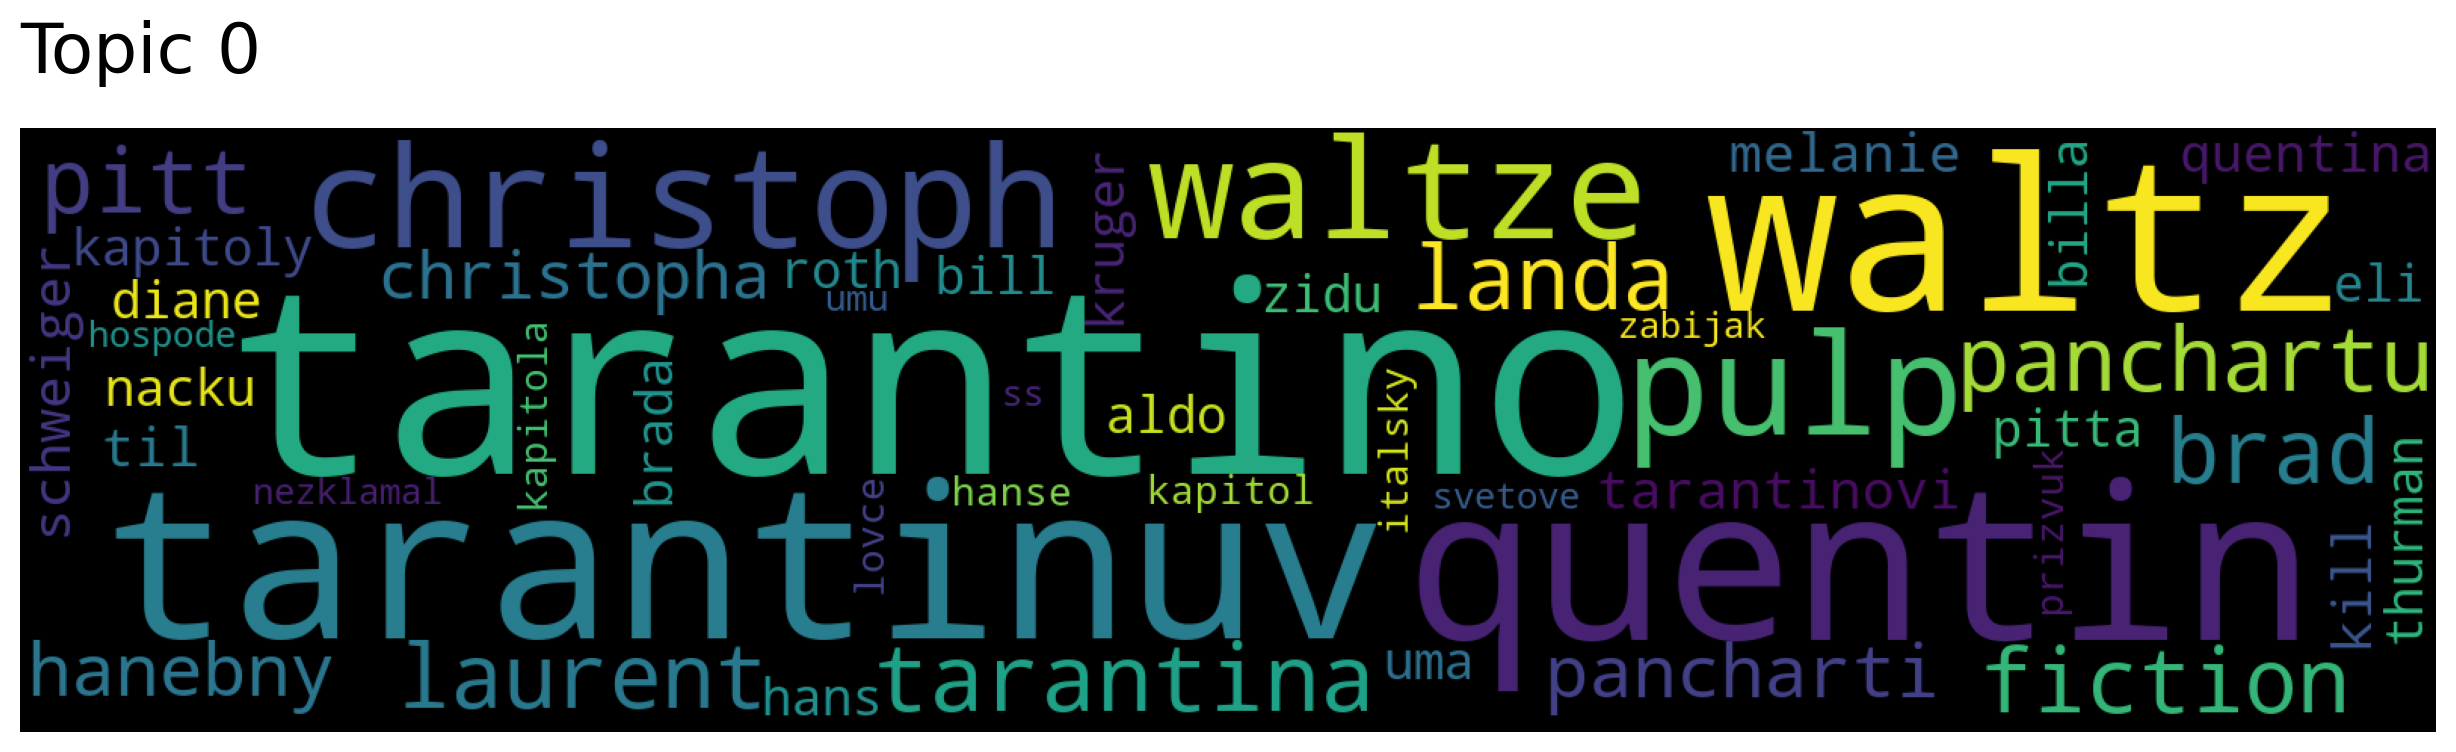

In [17]:
model.generate_topic_wordcloud(0)

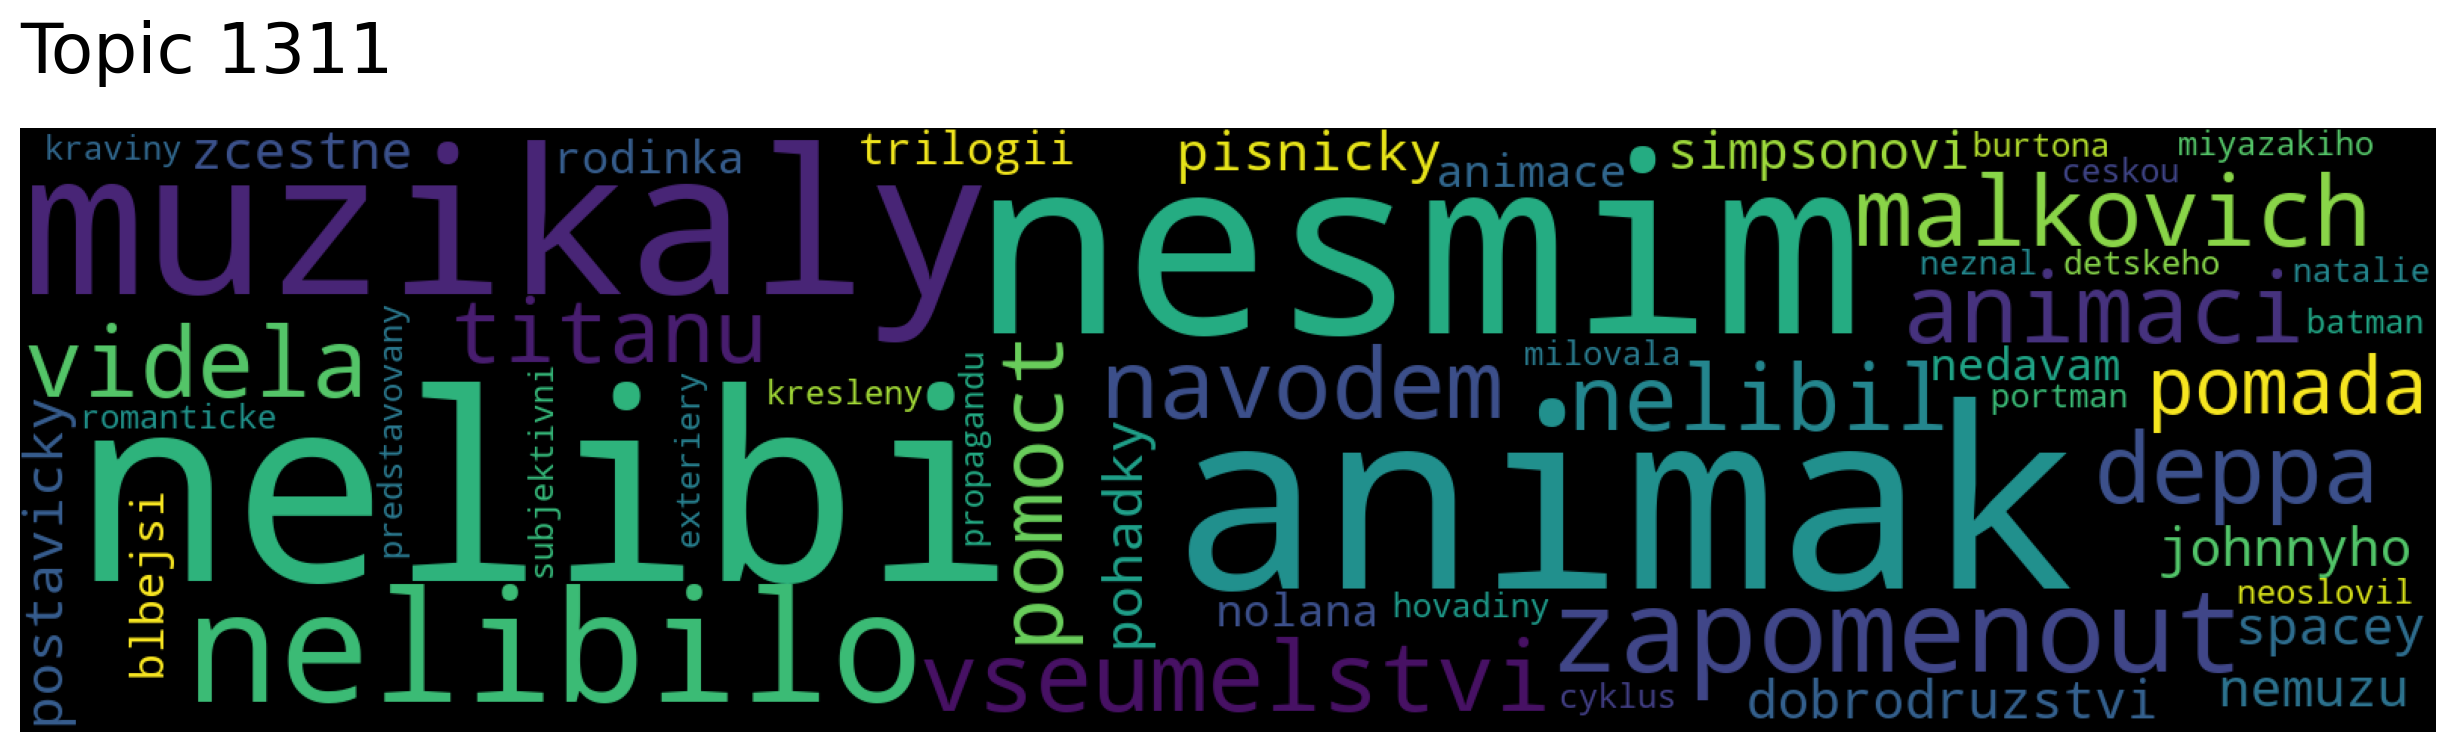

In [18]:
model.generate_topic_wordcloud(1311)

Pro porozumnění určitému tématu bývá užitečné zobrazit si pro ono téma nejtypičtější dokument. To provedeme aplikací metody *search_documents_by_topic*. Sem jako parametry vložíme index tématu (parametr *topic_num*) a počet chtěných dokumentů (parametr *num_docs*).

In [27]:
model.search_documents_by_topic(topic_num=0, num_docs=5)

(array(['nejlepší tarantinův film  ještě s kill bill  naprostá pecka  kde bylo napětí víc než dost ',
        'dle mého názoru zatím nejlepší tarantinův počin  výborný scénář  vynikající režie a naproto dokonalý christoph waltz  skutečně nemá chybu ',
        'úvodní kapitola je přímo skvostná  ty další dobré nebo hodně dobré  quentin nezklamal ',
        'tarantino opět ukázal  že je stále ve formě  jeho nejlepší film po pulp fiction  skutečně nemám slova  abych můj zažitek u toho filmu popsal  prostě úchvatné  skvělé  originální a hlavně ten černý humor  který natolik miluji u quentina ',
        'vynikající  zábavné  tarantinovské  tarantino ukazuje historii druhé světové války  tak jak podle něj měla být  vynikající režie  výborný scénář a dokonalý výběr herců jsou hlavní stavební kameny tarantinových filmů a tyto dovednosti potvrdil i tímhle filmem  christoph waltz byl naprosto famózní  dokonale slizký a celý film čekáte  kdy toho šmejda někdo odstřelí  brad pitt a jeho yankee hlá

Když chceme mít k dispozici k určité množině slov nejpodobnější témata, použijeme *search_topics*. Všimněme si, že na spodku výstupu je jednak cosinová podobnost mezi tématem a požadovanými klíčovými slovy, jednak indexy témat z listu na začátku výstupu.

In [26]:
model.search_topics(keywords=["fantasy"], num_topics=5)

([array(['trilogie', 'prstenu', 'krale', 'minas', 'tirith', 'jackson',
         'zakonceni', 'trilogii', 'frodo', 'bitva', 'navrat', 'epicke',
         'peter', 'fantasy', 'bitvy', 'navratu', 'velkolepe', 'kraje',
         'veze', 'knizni', 'sagy', 'vyvrcholeni', 'dustojne', 'oscaru',
         'howarda', 'bitevni', 'predchozich', 'jacksona', 'bitvu',
         'velkofilm', 'knihy', 'verze', 'samem', 'monumentalni',
         'natahovany', 'putovani', 'osudu', 'knize', 'dily', 'pana', 'knih',
         'velkolepa', 'predlohy', 'dilech', 'titanic', 'mckellen',
         'natahovane', 'mrtvych', 'velkolepy', 'matrixu'], dtype='<U15'),
  array(['mononoke', 'miyazakiho', 'miyazaki', 'anime', 'princezna',
         'fantazie', 'animovane', 'animace', 'fantasy', 'japonske',
         'animovany', 'princezny', 'japonsky', 'pohadka', 'prirody',
         'animak', 'prirode', 'animaci', 'nadherny', 'prince',
         'animovanych', 'animaku', 'kresleny', 'animovaneho', 'dospely',
         'pohadkove', 

Podobnou operaci lze udělat i na úrovni slov s pomocí metody *similar_words*.

In [30]:
model.similar_words(keywords=["troska"], keywords_neg=[], num_words=20)

(array(['kamenak', 'zdenek', 'kamenaku', 'soukup', 'vtipy', 'trosky',
        'pane', 'seno', 'olmer', 'slunce', 'pan', 'ceske', 'vtipu',
        'prosim', 'odpad', 'pohadek', 'dno', 'fuj', 'uz', 'pohadky'],
       dtype='<U8'),
 array([0.5894805 , 0.58316882, 0.50457273, 0.47715881, 0.45963369,
        0.45227802, 0.44188355, 0.43778577, 0.40868069, 0.40574008,
        0.39697387, 0.39465452, 0.39015243, 0.35767634, 0.35097335,
        0.3508741 , 0.34991583, 0.34206648, 0.33826142, 0.33790456]))

Výše jsme si mohli všimnout, že je mezi tématy, které si Top2Vec automaticky vygeneruje, docela velký překryv. Co máme dělat, když chceme počet extrémně podobných témat zredukovat? Použijeme metodu *hierarchical_topic_reduction*. Ta postupně slučuje ty nejpodobnější témata, dokud se jejich počet nerovná num_topics. Tato informace posléze zůstává zapsána v modelu. 

In [ ]:
model.hierarchical_topic_reduction(num_topics=500);

Jelikož běh *hierarchical_topic_reduction* nějakou dobu trvá, upravený model si uložíme.

In [40]:
model.save("top2vec_nonlem_reduc.bin")

In [2]:
model = Top2Vec.load("top2vec_nonlem_reduc.bin")

Jak byla jednotlivá témata sloučena zjistíme prostřednictvím metody *get_topic_hierarchy*.

In [8]:
model.get_topic_hierarchy()[0:3]

[[1],
 [1173, 0],
 [1181, 522, 326, 1248, 861, 353, 306, 333, 325, 443, 752, 796, 992, 1076, 20]]

V našem konkrétním případě vidíme například příbuznost mezi tématy 0 a 1173:

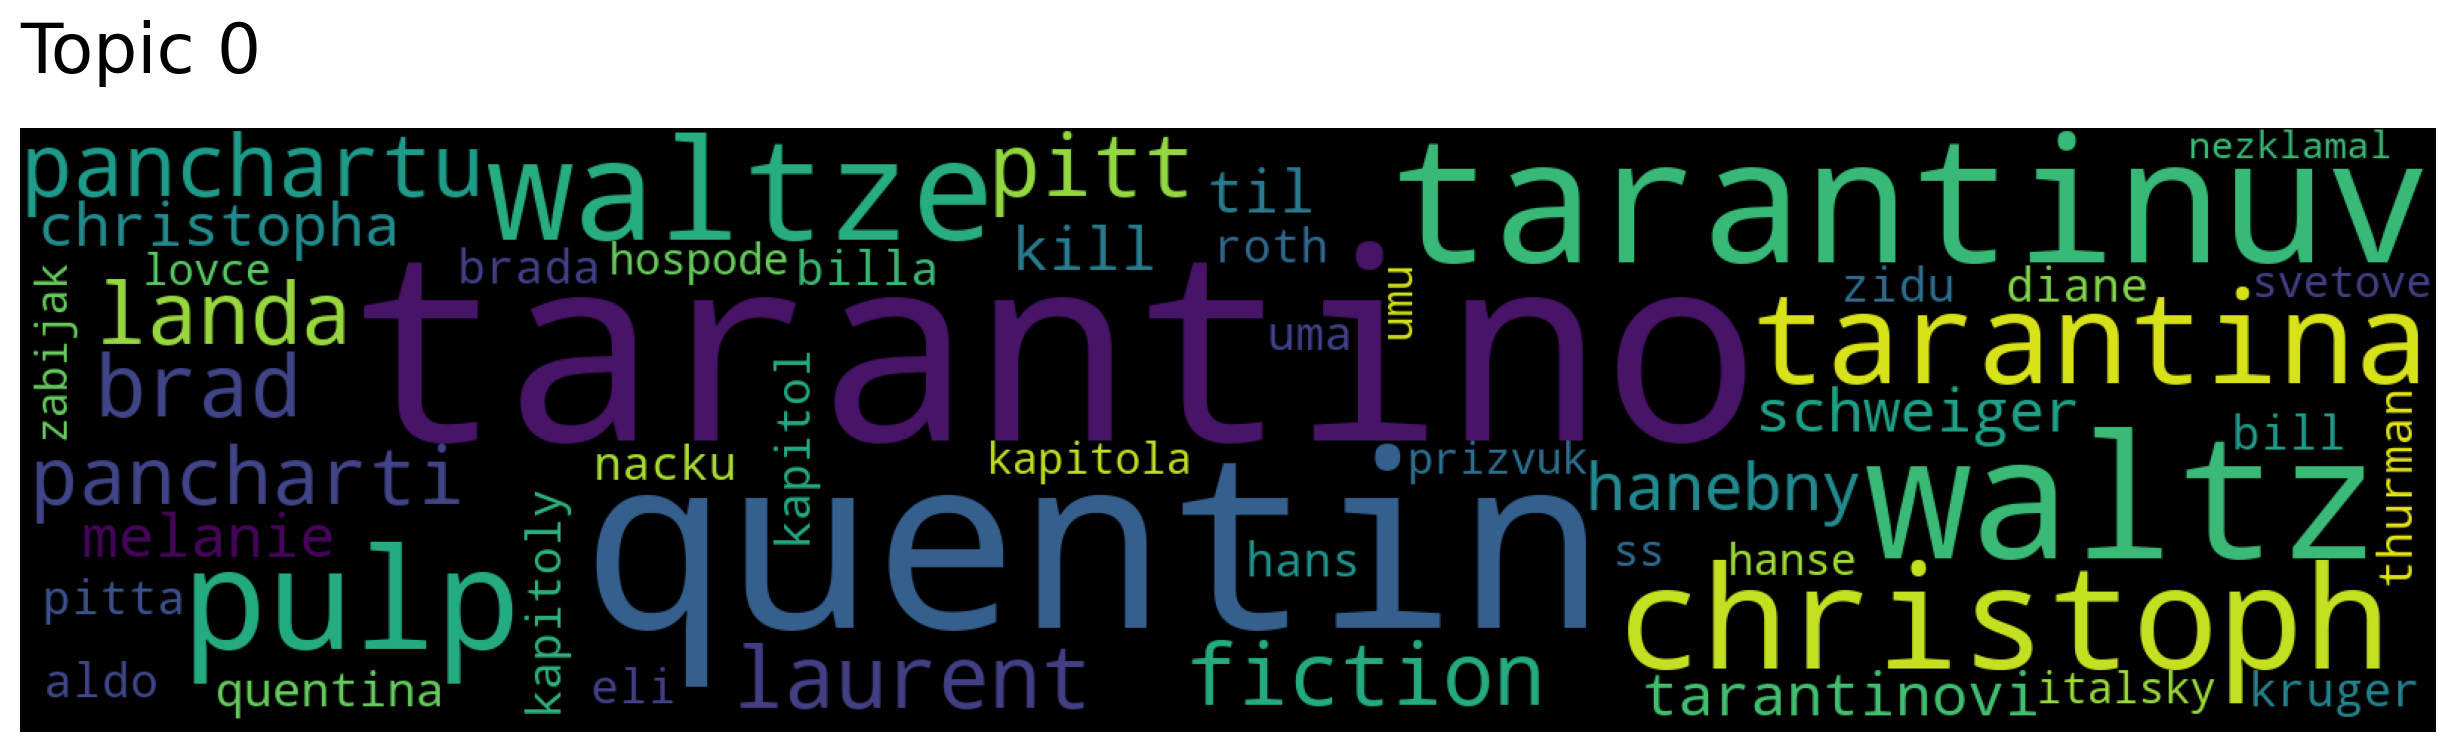

In [9]:
model.generate_topic_wordcloud(0)

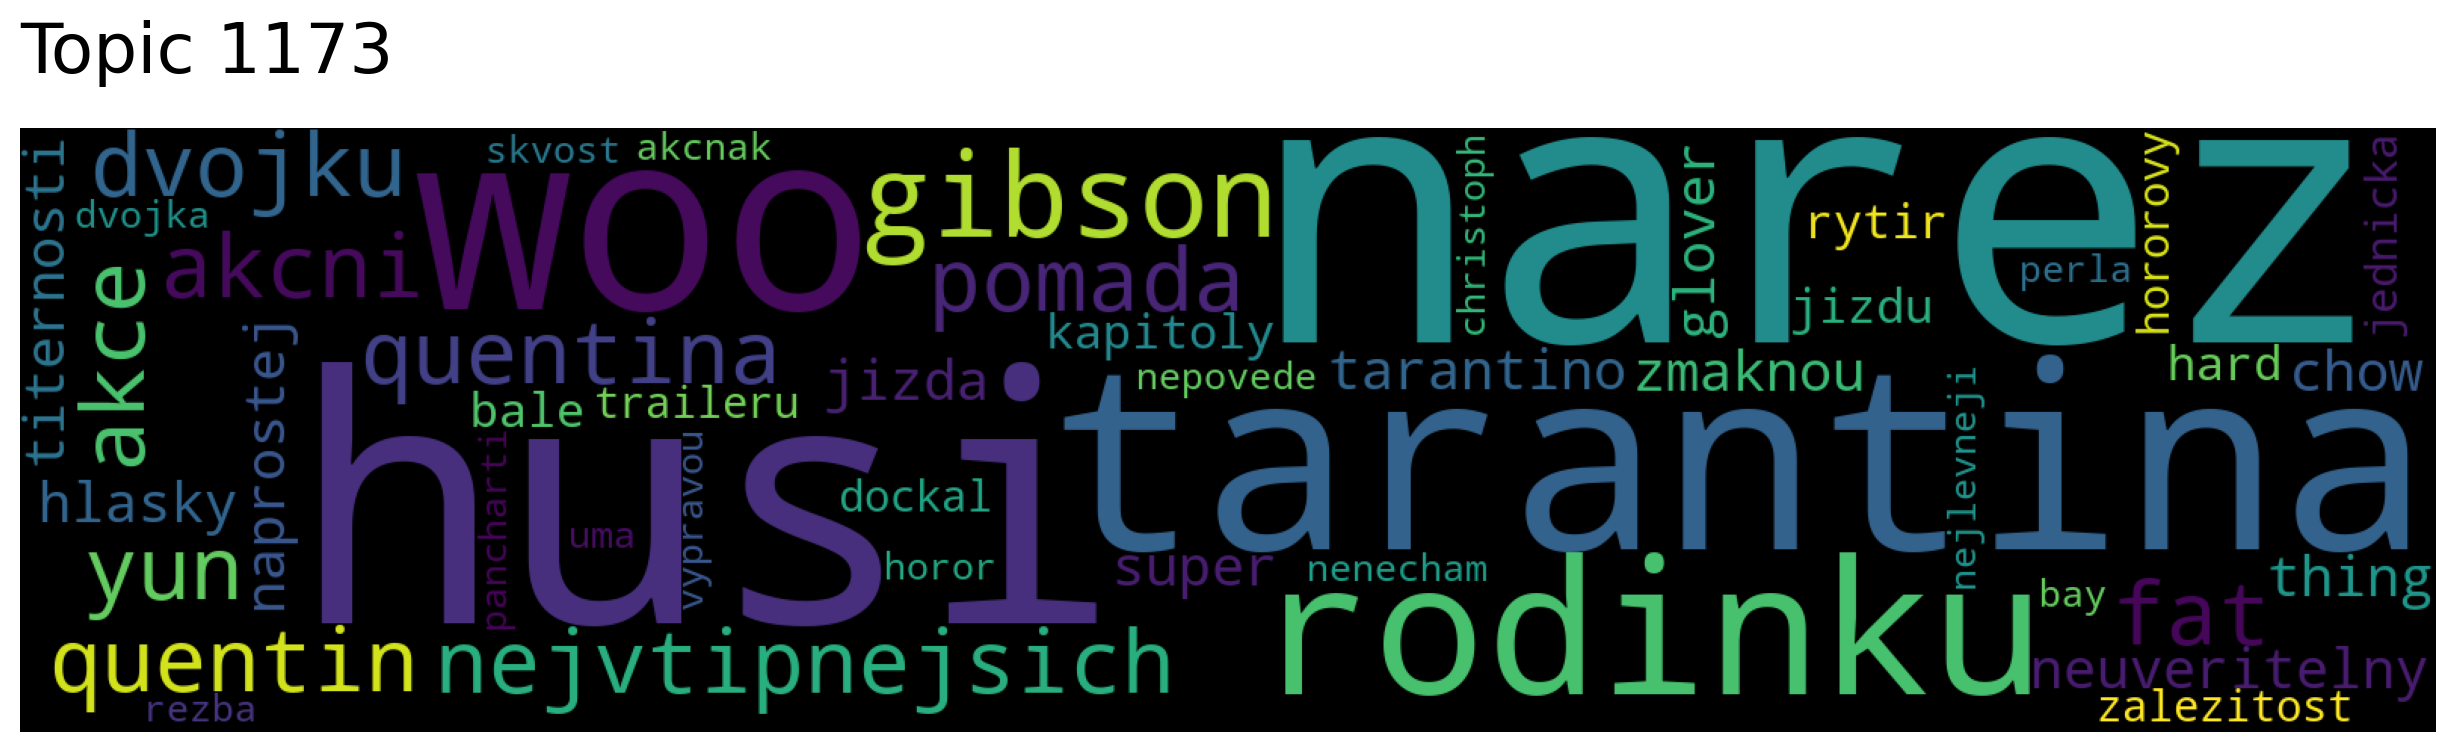

In [10]:
model.generate_topic_wordcloud(1173)

U metod, které to podporují, se k redukovaným tématům dostaneme pomocí parametru *reduced* nastaveného na True. Nicméně původní množina témat je stále dostupná a bez problému použitelná:

In [11]:
model.get_num_topics(reduced=True)

500

In [12]:
model.get_num_topics(reduced=False)

1312

U velikostí témat před a po redukci stojí za pozornost případ tématu s indexem 1 (před sjednocením) resp. 0 (po sjednocení). K tomuto tématu žádné jiné téma přidruženo nebylo. Nicméně i tak se u něj počet dokumentů zvýšil, neboť těžiště jeho konkuretnů se posunulo ve vektorovém prostoru dál.

In [13]:
model.get_topic_sizes(reduced=False)

(array([811, 705, 563, ...,  26,  26,  24], dtype=int64),
 array([   0,    1,    2, ..., 1309, 1310, 1311], dtype=int64))

In [39]:
model.get_topic_sizes(reduced=True)

(array([1048,  905,  711,  671,  669,  618,  613,  566,  539,  535,  494,
         460,  460,  448,  441,  431,  421,  411,  409,  409,  371,  356,
         354,  350,  345,  331,  330,  329,  326,  317,  315,  312,  310,
         309,  296,  295,  274,  274,  270,  264,  263,  262,  252,  251,
         248,  247,  246,  239,  238,  236,  235,  233,  233,  233,  232,
         228,  225,  225,  224,  222,  221,  220,  219,  219,  218,  218,
         218,  217,  217,  216,  216,  216,  215,  215,  214,  213,  211,
         211,  210,  210,  209,  209,  208,  208,  207,  206,  206,  206,
         205,  205,  205,  204,  204,  204,  204,  203,  203,  203,  202,
         201,  201,  201,  200,  199,  199,  198,  197,  197,  197,  196,
         196,  196,  196,  196,  195,  195,  194,  194,  194,  193,  193,
         193,  192,  192,  191,  191,  191,  190,  190,  190,  189,  188,
         188,  188,  188,  188,  188,  188,  188,  187,  187,  186,  186,
         186,  186,  186,  185,  184, 

I témata definující slova - anebo aspoň jejich pořadí - se též změnila.

In [41]:
model.get_topics(num_topics=5, reduced=True)

(array([['vztahu', 'zivot', 'lasky', 'syna', 'rodiny', 'spolecnosti',
         'rodine', 'matky', 'lidske', 'zivota', 'touze', 'spolecenske',
         'osud', 'zjistuje', 'zivotem', 'sveho', 'politicke', 'okoli',
         'systemu', 'rezimu', 'otce', 'tragedii', 'svetem', 'manzelstvi',
         'divka', 'hledani', 'mcmurphy', 'nemz', 'pratelstvi', 'dcery',
         'divky', 'udalosti', 'socialni', 'zeny', 'matkou', 'muz',
         'pracuje', 'dceru', 'touhy', 'zivoty', 'jedince', 'vlastni',
         'vypoved', 'jejiho', 'sledujeme', 'zit', 'zenu', 'statu',
         'matka', 'zobrazuje'],
        ['tarantino', 'quentin', 'waltz', 'tarantinuv', 'christoph',
         'waltze', 'pitt', 'panchartu', 'pulp', 'brad', 'tarantina',
         'laurent', 'landa', 'christopha', 'pancharti', 'hanebny',
         'schweiger', 'tarantinovi', 'fiction', 'til', 'melanie',
         'quentina', 'kill', 'pitta', 'kapitoly', 'zidu', 'brada', 'bill',
         'nacku', 'aldo', 'kruger', 'hans', 'eli', 'diane',

# NER (Named entity recognition)

Jedním z možných požadavků na datovou analytiku může být oštítkování určitého typu slov či sousloví. Sem mohou patřit jména lidí anebo třeba názvy firem. I takováto netriviální funkcionalita je dnes už podporována některými pythoními balíčky. Konkrétně v anglickém jazyce se jedná o dnes již diskutovaný spacy.  
Naimportujme si opět jak balíček, tak model, a tokenizujme anglickou větu.

In [2]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [24]:
doc = nlp("Bill Gates, who urged world leaders to prepare for a pandemic in 2015, lays out a 3-point plan on how the US can emerge victorious against COVID-19")

Podívejme se, co všechno se o jednotlivých tokenech můžeme dozvědět. Kromě již diskutovaných věcí se zde například nalézá pos_ atribut a tag_. atribut. První z nich je jednoduchý part-of-speech tag, druhý obsahuje tagování detailní.

In [25]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Bill Bill PROPN NNP compound Xxxx True False
Gates Gates PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
who who PRON WP nsubj xxx True True
urged urge VERB VBD relcl xxxx True False
world world NOUN NN compound xxxx True False
leaders leader NOUN NNS dobj xxxx True False
to to PART TO aux xx True True
prepare prepare VERB VB xcomp xxxx True False
for for ADP IN prep xxx True True
a a DET DT det x True True
pandemic pandemic NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
2015 2015 NUM CD pobj dddd False False
, , PUNCT , punct , False False
lays lay VERB VBZ ROOT xxxx True False
out out ADP RP prt xxx True True
a a DET DT det x True True
3-point 3-point NUM CD nummod d-xxxx False False
plan plan NOUN NN dobj xxxx True False
on on ADP IN prep xx True True
how how ADV WRB advmod xxx True True
the the DET DT det xxx True True
US US PROPN NNP nsubj XX True True
can can VERB MD aux xxx True True
emerge emerge VERB VB pcomp xxxx True False
victorious victorious 

Co to vlastně znamená? Podívejme se například na slovo "Bill". Zde pos_ = PROPN a tag_ = NNP. Použijeme funkci explain, abchom se dozvěděli, jaký význam tyto zkratky vlastně mají.

In [3]:
spacy.explain("PROPN")

'proper noun'

In [4]:
spacy.explain("NNP")

'noun, proper singular'

Zde je třeba vědět, že proper noun je podstatné jméno označující jednu konkrétní entitu (tj. je jím např. řetězec "Azor", ale nikoli "pes"). Vidímě, že tag_ přinesl navíc informaci o tom, zda se jedná o jednotné či množné číslo.

Další zajímavou informaci přináší token.dep_. Tento atribut ukazuje, jaký je vztah mezi slovy ve větě. Asi nejjednoduší je demonstrovat to pomocí obrázku:

In [26]:
displacy.serve(doc, style="dep")

c:\users\newnotebook\appdata\local\programs\python\python37\lib\runpy.py:193: UserWarning:

[W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.




Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Stejnou operaci můžeme udělat i po tzv. "noun chunks" - zkrátka po správně oddělených částech vět.

In [16]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)

Bill Gates Gates nsubj lays
who who nsubj urged
world leaders leaders dobj urged
a pandemic pandemic pobj for
a 3-point plan plan dobj lays
the US US nsubj emerge
COVID-19 COVID-19 pobj against


Jak je z nadpisu asi patrné, spacy dokáže rozpoznat typy entit v dokumentu. Entita není vlastnost jednotlivých tokenů, nýbrž se jedná o vlastnost dokumentu. Jelikož to spacy dokáže díky statistice nad modely a silně závisí na příkladech, na kterých byly tyto modely vytvořeny, je nutné v případě problému modely doupravit.

In [17]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Bill Gates 0 10 PERSON
2015 65 69 DATE
US 106 108 GPE


In [19]:
spacy.explain("GPE")

'Countries, cities, states'

Entity si můžeme dokonce v textu graficky zvýraznit:

In [20]:
displacy.serve(doc, style="ent")

c:\users\newnotebook\appdata\local\programs\python\python37\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Lze vytvořit i nový typ entit a ty pomocí nových příkladů trénováním do modelu dostat (více [zde](https://spacy.io/usage/training/#ner)). To ale vyžaduje mít pro určitý jazyk již připravený model...

Jaké možnosti ale máme v češtině? Lze použít balíček *nametag*, který podobně jako morphodita pochází z matfyzu - viz http://lindat.mff.cuni.cz/services/nametag/. I tento balíček pro své fungování vyžaduje jazykový model a i tento model je pod non-commercial licencí.  

In [1]:
from ufal.nametag import *
ner = Ner.load("czech-cnec2.0-140304.ner")
tokenizer = ner.newTokenizer()

In [11]:
def sort_entities(entities):
    return sorted(entities, key=lambda entity: (entity.start, -entity.length))

text = "Václav Havel byl prezident České republiky. Komerční banka měla sídlo poblíž Václavského náměstí."
tokenizer.setText(text)
forms = Forms()
tokens = TokenRanges()
entities = NamedEntities()
sortedEntities = []
openEntities = []
while tokenizer.nextSentence(forms, tokens):
    ner.recognize(forms, entities)
    sortedEntities = sort_entities(entities)
    for entity in sortedEntities:
        starting_index = tokens[entity.start].start
        ending_index = tokens[entity.start+entity.length-1].start + tokens[entity.start+entity.length-1].length
        print("Entity: ", text[starting_index:ending_index], " Type: ", entity.type)

Entity:  Václav Havel  Type:  P
Entity:  Václav  Type:  pf
Entity:  Havel  Type:  ps
Entity:  České republiky  Type:  gc
Entity:  Komerční banka  Type:  if
Entity:  Václavského náměstí  Type:  gs


Z příkladu je mimo jiné vidět, že si *nametag* poradí i s tvary nepřevedenými do prvního pádu. 

Existuje ještě jiný způsob, jak na českém textu NER realizovat. Jedná se o BERT-like knihovnu/framework DeepPavlov. Jak u něj rozpoznávání entit realizovat? Následující kód
```python
from deeppavlov import configs, build_model

ner_model = build_model(configs.ner.ner_ontonotes_bert_mult)
print(ner_model(['Bob Ross lived in Florida']))
print(ner_model(['Hostinský Dominik Výčep, vlastník hospody Na Mýtince, má účet u Komerční banky a Monety.']))
print(ner_model(['Firma Agrofert prý nyní už nepatří šéfovi ANO Andreji Babišovi.']))
print(ner_model(['Josef Vyskočil zaplatil 55 Kč a poté 3. února 2020 získal produkt Můj Účet Plus.']))
```
vytvoří takovýto výstup:  
[[['Bob', 'Ross', 'lived', 'in', 'Florida']], [['B-PERSON', 'I-PERSON', 'O', 'O', 'B-GPE']]]  
[[['Hostinský', 'Dominik', 'Výčep', ',', 'vlastník', 'hospody', 'Na', 'Mýtince', ',', 'má', 'účet', 'u', 'Komerční', 'banky', 'a', 'Monety', '.']], [['B-GPE', 'B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'B-FAC', 'I-FAC', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'B-ORG', 'O']]]  
[[['Firma', 'Agrofert', 'prý', 'nyní', 'už', 'nepatří', 'šéfovi', 'ANO', 'Andreji', 'Babišovi', '.']], [['O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'B-PERSON', 'I-PERSON', 'O']]]  
[[['Josef', 'Vyskočil', 'zaplatil', '55', 'Kč', 'a', 'poté', '3', '.', 'února', '2020', 'získal', 'produkt', 'Můj', 'Účet', 'Plus', '.']], [['B-PERSON', 'I-PERSON', 'O', 'B-MONEY', 'I-MONEY', 'O', 'O', 'B-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'B-PRODUCT', 'I-PRODUCT', 'I-PRODUCT', 'O']]]  

Co řádek, to dvojice původní tokenizovaná věta - list s rozepsáním entit. Vlastní tokeny zde mají i čárky a tečky. Je vidět, že multijazykový model si poradí součaně jak s angličtinou, tak s češtinou. Tokeny, které do žádné entity nepatří, jsou označeny písmenem O. Prefix B- značí počátek entity, I- její pokračování. Význam některých entit je zjevný, snad ale poznamenejme, že GPE značí země a města a FAC budovy. Vidíme, že jména osob, datumy i finanční částky jsou v příkladu výše odhadnuty správně. Slovo "Hostinský" bylo bohužel chybně označeno jako entita země/město. Naprosti tomu ANO a obě banky byly správně rozpoznány jako organizace.  
Hlavní problém s DeepPalovem (a vlastně obecně s čímkoli založeném na BERTu) je hardwarová náročnost. A to i když člověk neplánuje model přeučovat a opravdu ho chce jenom použít. Několikagigový model se totiž celý musí načíst do RAMky. Jelikož mám na svém počítači jen 8 GB, tak se mi výše uvedený kód nepodařilo rozběhnout v Jupyteru a musel jsem ho spouštět jako samostatný pythoní skript.